In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from os.path import join, isfile
from os import path, scandir, listdir

from source.aggregated_stats import process_details, full_stats
import source.explore as exp

pd.set_option("max_columns", 300)

In [2]:
def list_all_files(location='../input/', pattern=None, recursive=True):
    """
    This function returns a list of files at a given location (including subfolders)
    
    - location: path to the directory to be searched
    - pattern: part of the file name to be searched (ex. pattern='.csv' would return all the csv files)
    - recursive: boolean, if True the function calls itself for every subdirectory it finds
    """
    subdirectories= [f.path for f in scandir(location) if f.is_dir()]
    files = [join(location, f) for f in listdir(location) if isfile(join(location, f))]
    if recursive:
        for directory in subdirectories:
            files.extend(list_all_files(directory))
    if pattern:
        files = [f for f in files if pattern in f]
    return files

In [3]:
women_comp = list_all_files('data/raw_women/')

In [4]:
women_comp

['data/raw_women/WSampleSubmissionStage1.csv',
 'data/raw_women/WSampleSubmissionStage2.csv',
 'data/raw_women/2019 NCAAW Tournament Solution File.csv',
 'data/raw_women/WDataFiles/WRegularSeasonCompactResults.csv',
 'data/raw_women/WDataFiles/WTeamSpellings.csv',
 'data/raw_women/WDataFiles/WSeasons.csv',
 'data/raw_women/WDataFiles/WGameCities.csv',
 'data/raw_women/WDataFiles/WNCAATourneyDetailedResults.csv',
 'data/raw_women/WDataFiles/WTeams.csv',
 'data/raw_women/WDataFiles/WNCAATourneySeeds.csv',
 'data/raw_women/WDataFiles/WCities.csv',
 'data/raw_women/WDataFiles/WRegularSeasonDetailedResults.csv',
 'data/raw_women/WDataFiles/WNCAATourneySlots.csv',
 'data/raw_women/WDataFiles/WNCAATourneyCompactResults.csv',
 'data/raw_women/Stage2WDataFiles/WRegularSeasonCompactResults.csv',
 'data/raw_women/Stage2WDataFiles/WTeamSpellings.csv',
 'data/raw_women/Stage2WDataFiles/WSeasons.csv',
 'data/raw_women/Stage2WDataFiles/WGameCities.csv',
 'data/raw_women/Stage2WDataFiles/WNCAATourneyD

# submission file

In [5]:
df = pd.read_csv(women_comp[0])
df[['year', 'Team_1', 'Team_2']] = pd.DataFrame(df['ID'].str.split('_').values.tolist(), index=df.index)
df['year'] = pd.to_numeric(df.year)
df.head()

,ID,Pred,year,Team_1,Team_2
0,2014_3103_3107,0.5,2014,3103,3107
1,2014_3103_3113,0.5,2014,3103,3113
2,2014_3103_3119,0.5,2014,3103,3119
3,2014_3103_3124,0.5,2014,3103,3124
4,2014_3103_3140,0.5,2014,3103,3140


In [6]:
df.year.value_counts(dropna=False)

2015    2016
2014    2016
2018    2016
2017    2016
2016    2016
Name: year, dtype: int64

In [7]:
df = pd.read_csv(women_comp[1])
df[['year', 'Team_1', 'Team_2']] = pd.DataFrame(df['ID'].str.split('_').values.tolist(), index=df.index)
df['year'] = pd.to_numeric(df.year)
df.head()

,ID,Pred,year,Team_1,Team_2
0,2019_3101_3113,0.5,2019,3101,3113
1,2019_3101_3114,0.5,2019,3101,3114
2,2019_3101_3120,0.5,2019,3101,3120
3,2019_3101_3124,0.5,2019,3101,3124
4,2019_3101_3125,0.5,2019,3101,3125


In [8]:
df.year.value_counts(dropna=False)

2019    2016
Name: year, dtype: int64

# Teams.csv

In [9]:
[file for file in women_comp if 'Teams.csv' in file]

['data/raw_women/WDataFiles/WTeams.csv',
 'data/raw_women/Stage2WDataFiles/WTeams.csv']

In [11]:
df = pd.read_csv('data/raw_women/Stage2WDataFiles/WTeams.csv')
df.shape

(366, 2)

In [13]:
df.head()

,TeamID,TeamName
0,3101,Abilene Chr
1,3102,Air Force
2,3103,Akron
3,3104,Alabama
4,3105,Alabama A&M


# Seasons.csv

In [15]:
[file for file in women_comp if 'Seasons.csv' in file]

['data/raw_women/WDataFiles/WSeasons.csv',
 'data/raw_women/Stage2WDataFiles/WSeasons.csv']

In [16]:
df = pd.read_csv('data/raw_women/Stage2WDataFiles/WSeasons.csv')
print(df.shape)
df.head()

(22, 6)


,Season,DayZero,RegionW,RegionX,RegionY,RegionZ
0,1998,10/27/1997,East,Midwest,Mideast,West
1,1999,10/26/1998,East,Mideast,Midwest,West
2,2000,11/1/1999,East,Midwest,Mideast,West
3,2001,10/30/2000,East,Midwest,Mideast,West
4,2002,10/29/2001,East,West,Mideast,Midwest


In [17]:
df.RegionW.value_counts()

East           7
Albany         3
Bridgeport     3
Dallas         2
DesMoines      1
Berkeley       1
Lincoln        1
Chattanooga    1
Albuquerque    1
Greensboro     1
Dayton         1
Name: RegionW, dtype: int64

In [18]:
df.RegionX.value_counts()

Spokane         4
Midwest         3
Mideast         2
West            2
Fresno          1
Trenton         1
OklahomaCity    1
Chicago         1
Cleveland       1
Stanford        1
Tempe           1
Memphis         1
Norfolk         1
Dayton          1
Dallas          1
Name: RegionX, dtype: int64

In [19]:
df.RegionY.value_counts()

Mideast         5
KansasCity      3
Midwest         2
Lexington       2
Greensboro      2
OklahomaCity    2
Fresno          1
Bridgeport      1
Dayton          1
NewOrleans      1
Louisville      1
Kingston        1
Name: RegionY, dtype: int64

In [20]:
df.RegionZ.value_counts()

West            5
Philadelphia    2
Midwest         2
Raleigh         2
OklahomaCity    2
Spokane         1
Portland        1
San Antonio     1
Sacramento      1
Stockton        1
NotreDame       1
Lexington       1
SiouxFalls      1
Greensboro      1
Name: RegionZ, dtype: int64

# Regular season compact results

In [22]:
[file for file in women_comp if 'RegularSeasonCompact' in file]

['data/raw_women/WDataFiles/WRegularSeasonCompactResults.csv',
 'data/raw_women/Stage2WDataFiles/WRegularSeasonCompactResults.csv']

In [23]:
df = pd.read_csv('data/raw_women/Stage2WDataFiles/WRegularSeasonCompactResults.csv')
print(df.shape)
df.head()

(107133, 8)


,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
0,1998,18,3104,91,3202,41,H,0
1,1998,18,3163,87,3221,76,H,0
2,1998,18,3222,66,3261,59,H,0
3,1998,18,3307,69,3365,62,H,0
4,1998,18,3349,115,3411,35,H,0


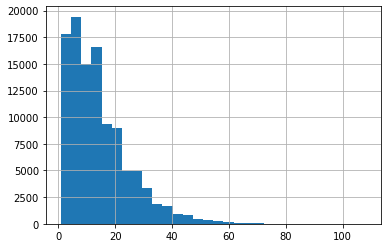

In [24]:
df['point_diff'] = df.WScore - df.LScore
df.point_diff.hist(bins=30)

In [25]:
df.describe()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,NumOT,point_diff
count,107133.000000,107133.000000,107133.000000,107133.000000,107133.000000,107133.000000,107133.000000,107133.000000
mean,2008.965884,71.434712,3284.191286,71.824704,3284.281305,57.498269,0.036431,14.326435
std,6.252169,34.951572,103.765906,11.339789,104.908087,10.800031,0.219652,10.867366
min,1998.000000,1.000000,3101.000000,30.000000,3101.000000,11.000000,0.000000,1.000000
25%,2004.000000,40.000000,3195.000000,64.000000,3192.000000,50.000000,0.000000,6.000000
50%,2009.000000,75.000000,3281.000000,71.000000,3284.000000,57.000000,0.000000,12.000000
75%,2014.000000,102.000000,3376.000000,79.000000,3375.000000,64.000000,0.000000,19.000000
max,2019.000000,132.000000,3466.000000,140.000000,3466.000000,130.000000,5.000000,108.000000


In [26]:
summaries = df[['Season', 
    'WScore', 
    'LScore', 
    'NumOT', 
    'point_diff']].groupby('Season').agg(['min', 'max', 'mean', 'median'])

summaries.columns = ['_'.join(col).strip() for col in summaries.columns.values]
summaries

,WScore_min,WScore_max,WScore_mean,WScore_median,LScore_min,LScore_max,LScore_mean,LScore_median,NumOT_min,NumOT_max,NumOT_mean,NumOT_median,point_diff_min,point_diff_max,point_diff_mean,point_diff_median
Season,,,,,,,,,,,,,,,,
1998,39,126,75.299441,75,27,101,60.293340,60,0,0,0.000000,0,1,80,15.006101,13
1999,38,130,74.747577,74,20,111,60.192390,60,0,0,0.000000,0,1,97,14.555188,12
2000,37,133,74.013339,73,25,104,59.191047,59,0,0,0.000000,0,1,80,14.822293,13
2001,36,135,74.278943,74,24,104,59.652917,59,0,0,0.000000,0,1,98,14.626026,12
2002,42,124,73.595371,73,23,99,58.876920,59,0,0,0.000000,0,1,80,14.718451,12
2003,37,128,72.299628,72,16,102,57.940906,58,0,0,0.000000,0,1,78,14.358722,12
2004,38,125,71.196304,71,18,119,57.298261,57,0,0,0.000000,0,1,82,13.898043,12
2005,37,118,69.858742,69,22,99,55.830534,56,0,4,0.050172,0,1,79,14.028208,11
2006,38,119,71.175834,71,22,95,57.262901,57,0,3,0.056275,0,1,86,13.912933,12


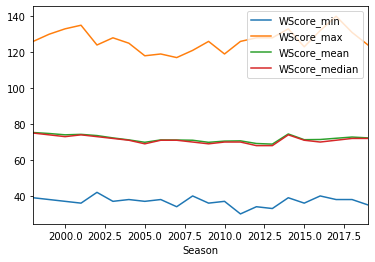

In [27]:
summaries[[col for col in summaries.columns if 'WScore' in col and 'sum' not in col]].plot()

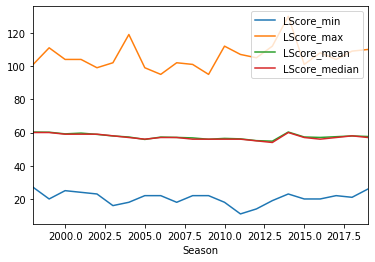

In [28]:
summaries[[col for col in summaries.columns if 'LScore' in col and 'sum' not in col]].plot()

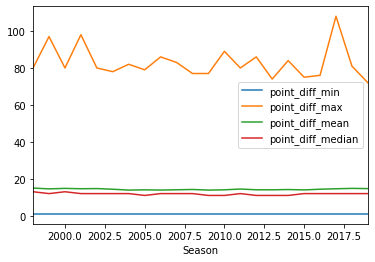

In [29]:
summaries[[col for col in summaries.columns if 'point_diff' in col and 'sum' not in col]].plot()

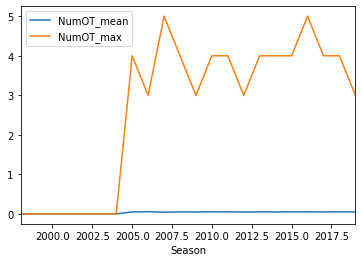

In [30]:
summaries[['NumOT_mean', 'NumOT_max']].plot()

In [31]:
summaries = df[['Season', 'WLoc',
    'WScore', 
    'LScore', 
    'NumOT', 
    'point_diff']].groupby(['Season', 'WLoc']).agg(['min', 'max', 'mean', 'median', 'count'])

summaries.columns = ['_'.join(col).strip() for col in summaries.columns.values]
summaries

WScore_min  WScore_max  WScore_mean  WScore_median  WScore_count  \
Season WLoc                                                                     
1998   A             44         125    73.777702             73          1471   
       H             39         126    76.208283             76          2463   
1999   A             45         116    73.192547             73          1610   
       H             38         130    75.706804             75          2616   
       N             61          86    73.600000             73             5   
...                 ...         ...          ...            ...           ...   
2018   H             38         131    73.510406             72          2835   
       N             46         113    72.439516             72           496   
2019   A             41         111    70.874802             70          1893   
       H             35         124    73.243149             72          2883   
       N             45         113    72.297414             72           464   

             LScore_min  LScore_max  LScore_mean  LScore_median  LScore_count  \
Season WLoc                                                                     
1998   A             27         101    61.089055           61.0          1471   
       H             27          95    59.818108           60.0          2463   
1999   A             29         111    60.837888           61.0          1610   
       H             20         101    59.784404           59.0          2616   
       N             52          79    65.800000           64.0             5   
...                 ...         ...          ...            ...           ...   
2018   H             24         108    57.450441           57.0          2835   
       N             21         109    58.578629           58.0           496   
2019   A             28          98    58.230322           58.0          1893   
       H             26         110    56.987513           57.0          2883   
       N             29         107    58.900862           58.0           464   

             NumOT_min  NumOT_max  NumOT_mean  NumOT_median  NumOT_count  \
Season WLoc                                                                
1998   A             0          0    0.000000             0         1471   
       H             0          0    0.000000             0         2463   
1999   A             0          0    0.000000             0         1610   
       H             0          0    0.000000             0         2616   
       N             0          0    0.000000             0            5   
...                ...        ...         ...           ...          ...   
2018   H             0          3    0.047266             0         2835   
       N             0          4    0.062500             0          496   
2019   A             0          3    0.058109             0         1893   
       H             0          3    0.041970             0         2883   
       N             0          2    0.071121             0          464   

             point_diff_min  point_diff_max  point_diff_mean  \
Season WLoc                                                    
1998   A                  1              79        12.688647   
       H                  1              80        16.390175   
1999   A                  1              62        12.354658   
       H                  1              97        15.922401   
       N                  1              18         7.800000   
...                     ...             ...              ...   
2018   H                  1              81        16.059965   
       N                  1              57        13.860887   
2019   A                  1              56        12.644480   
       H                  1              72        16.255636   
       N                  1              51        13.396552   

             point_diff_median  point_diff_count  
Season WLoc                     

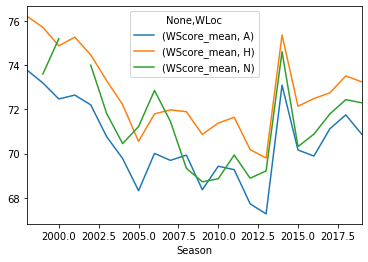

In [32]:
summaries[['WScore_mean']].unstack().plot()

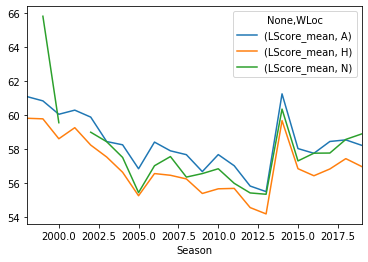

In [33]:
summaries[['LScore_mean']].unstack().plot()

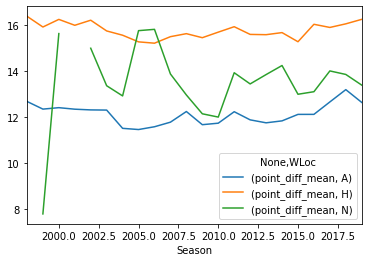

In [34]:
summaries[['point_diff_mean']].unstack().plot()

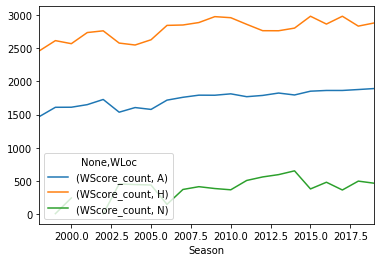

In [35]:
summaries[['WScore_count']].unstack().plot()

# Playoff compact results

In [37]:
[file for file in women_comp if 'NCAATourneyCompact' in file]

['data/raw_women/WDataFiles/WNCAATourneyCompactResults.csv',
 'data/raw_women/Stage2WDataFiles/WNCAATourneyCompactResults.csv']

In [38]:
df = pd.read_csv('data/raw_women/Stage2WDataFiles/WNCAATourneyCompactResults.csv')
print(df.shape)
df.head()

(1323, 8)


,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
0,1998,137,3104,94,3422,46,H,0
1,1998,137,3112,75,3365,63,H,0
2,1998,137,3163,93,3193,52,H,0
3,1998,137,3198,59,3266,45,H,0
4,1998,137,3203,74,3208,72,A,0


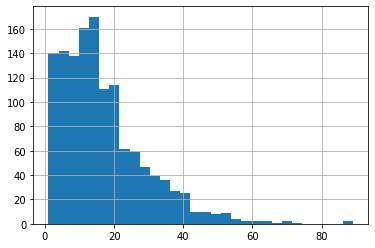

In [39]:
df['point_diff'] = df.WScore - df.LScore
df.point_diff.hist(bins=30)

In [40]:
summaries = df[['Season', 
    'WScore', 
    'LScore', 
    'NumOT', 
    'point_diff']].groupby('Season').agg(['min', 'max', 'mean', 'median'])

summaries.columns = ['_'.join(col).strip() for col in summaries.columns.values]
summaries

,WScore_min,WScore_max,WScore_mean,WScore_median,LScore_min,LScore_max,LScore_mean,LScore_median,NumOT_min,NumOT_max,NumOT_mean,NumOT_median,point_diff_min,point_diff_max,point_diff_mean,point_diff_median
Season,,,,,,,,,,,,,,,,
1998,55,102,78.587302,77,39,80,63.396825,64,0,0,0.000000,0,1,53,15.190476,14
1999,53,113,76.444444,76,41,92,60.650794,61,0,0,0.000000,0,2,59,15.793651,13
2000,57,116,78.031746,77,38,85,61.634921,63,0,0,0.000000,0,1,71,16.396825,15
2001,51,104,79.444444,79,29,87,61.365079,63,0,0,0.000000,0,2,72,18.079365,15
2002,55,98,76.507937,76,35,79,59.111111,60,0,0,0.000000,0,1,49,17.396825,15
2003,50,95,72.507937,72,33,85,57.015873,57,0,0,0.000000,0,1,52,15.492063,13
2004,52,103,72.285714,71,42,85,57.952381,58,0,0,0.000000,0,1,52,14.333333,13
2005,58,97,73.126984,71,33,79,56.126984,57,0,0,0.000000,0,1,51,17.000000,12
2006,57,102,75.857143,75,27,75,59.920635,61,0,1,0.047619,0,2,69,15.936508,14


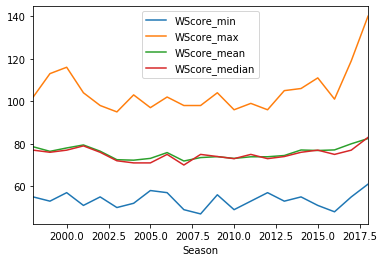

In [41]:
summaries[[col for col in summaries.columns if 'WScore' in col and 'sum' not in col]].plot()

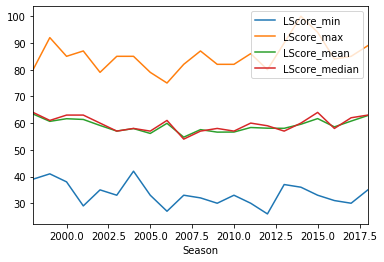

In [42]:
summaries[[col for col in summaries.columns if 'LScore' in col and 'sum' not in col]].plot()

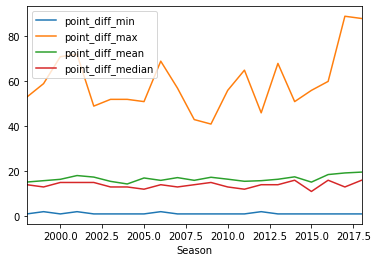

In [43]:
summaries[[col for col in summaries.columns if 'point_diff' in col and 'sum' not in col]].plot()

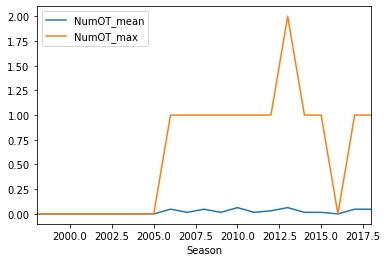

In [44]:
summaries[['NumOT_mean', 'NumOT_max']].plot()

In [45]:
df.WLoc.value_counts()

N    674
H    521
A    128
Name: WLoc, dtype: int64

# Detailed results

In [47]:
[col for col in women_comp if 'Detailed' in col]

['data/raw_women/WDataFiles/WNCAATourneyDetailedResults.csv',
 'data/raw_women/WDataFiles/WRegularSeasonDetailedResults.csv',
 'data/raw_women/Stage2WDataFiles/WNCAATourneyDetailedResults.csv',
 'data/raw_women/Stage2WDataFiles/WRegularSeasonDetailedResults.csv']

In [48]:
reg_season = pd.read_csv('data/raw_women/Stage2WDataFiles/WRegularSeasonDetailedResults.csv')
print(df.shape)
stats = [col for col in reg_season.columns if 'W' in col and 'ID' not in col and 'Loc' not in col]

reg_season = process_details(reg_season)

reg_season.head()

(1323, 9)


,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,WFGM3,WFGA3,WFTM,WFTA,WOR,WDR,WAst,WTO,WStl,WBlk,WPF,LFGM,LFGA,LFGM3,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF,WFG_perc,WFGM2,WFGA2,WFG2_perc,WFG3_perc,WFT_perc,WTot_Reb,WFGM_no_ast,WFGM_no_ast_perc,Wpossessions,Woff_rating,Wscoring_opp,WTO_perposs,LFG_perc,LFGM2,LFGA2,LFG2_perc,LFG3_perc,LFT_perc,LTot_Reb,LFGM_no_ast,LFGM_no_ast_perc,Lpossessions,Loff_rating,Lscoring_opp,LTO_perposs,Wdef_rating,Ldef_rating,Wimpact,Limpact,WDef_effort,LDef_effort,WReb_opp,LReb_opp,Score_diff,FGM_diff,FGA_diff,FGM3_diff,FGA3_diff,FTM_diff,FTA_diff,OR_diff,DR_diff,Ast_diff,TO_diff,Stl_diff,Blk_diff,PF_diff,FGM2_diff,FGA2_diff,Tot_Reb_diff,FGM_no_ast_diff,Def_effort_diff,Reb_opp_diff,possessions_diff,off_rating_diff,def_rating_diff,scoring_opp_diff,TO_perposs_diff,impact_diff
0,2010,11,3103,63,3237,49,H,0,23,54,5,9,12,19,10,26,14,18,7,0,15,20,54,3,13,6,10,11,27,11,23,7,6,19,0.425926,18,45,0.400000,0.555556,0.631579,36,9,0.391304,52.975,118.924021,1.189712,0.339783,0.370370,17,41,0.414634,0.230769,0.600000,38,9,0.450000,61.250,80.000000,0.959184,0.375510,80.000000,118.924021,0.576744,0.423256,69.759259,73.500000,0.764706,0.870968,14,3,0,2,-4,6,9,-1,-1,3,-5,0,-6,-4,1,4,-2,0,-3.740741,-0.106262,-8.275,38.924021,-38.924021,0.230528,-0.035727,0.153488
1,2010,11,3104,73,3399,68,N,0,26,62,5,12,16,28,16,31,15,20,5,2,25,25,63,4,21,14,27,14,26,7,20,4,2,27,0.419355,21,50,0.420000,0.416667,0.571429,47,11,0.423077,52.700,138.519924,1.428843,0.379507,0.396825,21,42,0.500000,0.190476,0.518519,40,18,0.720000,56.175,121.050289,1.349800,0.356030,121.050289,138.519924,0.631579,0.368421,109.333333,89.322581,0.815789,0.722222,5,1,-1,1,-9,2,1,2,5,8,0,1,0,-2,0,8,7,-7,20.010753,0.093567,-3.475,17.469635,-17.469635,0.079043,0.023476,0.263158
2,2010,11,3110,71,3224,59,A,0,29,62,6,15,7,12,14,23,18,13,6,2,17,19,58,2,14,19,23,17,23,8,15,6,0,15,0.467742,23,47,0.489362,0.400000,0.583333,37,11,0.379310,55.300,128.390597,1.224231,0.235081,0.327586,17,44,0.386364,0.142857,0.826087,40,11,0.578947,45.075,130.892956,1.529118,0.332779,130.892956,128.390597,0.604255,0.395745,84.448276,63.516129,0.589744,0.696970,12,10,4,4,1,-12,-11,-3,0,10,-2,0,2,2,6,3,-3,0,20.932147,-0.107226,10.225,-2.502359,2.502359,-0.304887,-0.097697,0.208511
3,2010,11,3111,63,3267,58,A,0,27,52,4,11,5,9,6,40,14,27,5,10,18,18,74,6,26,16,25,22,22,15,11,14,5,14,0.519231,23,41,0.560976,0.363636,0.555556,46,13,0.481481,68.725,91.669698,0.818843,0.392870,0.243243,12,48,0.250000,0.230769,0.640000,44,3,0.166667,51.125,113.447433,1.679707,0.215159,113.447433,91.669698,0.656126,0.343874,123.054054,58.634615,0.714286,0.880000,5,9,-22,-2,-15,-11,-16,-16,18,-1,16,-9,5,4,11,-7,2,10,64.419439,-0.165714,17.600,-21.777735,21.777735,-0.860863,0.177711,0.312253
4,2010,11,3119,74,3447,70,H,1,30,74,7,20,7,11,14,33,18,11,5,3,18,25,74,9,17,11,21,21,32,12,14,4,2,14,0.405405,23,54,0.425926,0.350000,0.636364,47,12,0.400000,65.775,112.504751,1.204485,0.167237,0.337838,16,57,0.280702,0.529412,0.523810,53,13,0.520000,57.025,122.753178,1.472600,0.245506,122.753178,112.504751,0.562016,0.437984,95.000000,87.189189,0.673469,0.727273,4,5,0,-2,3,-4,-10,-7,1,6,-3,1,1,4,7,-3,-6,-1,7.810811,-0.053803,8.750,-10.248427,10.248427,-0.268115,-0.078270,0.124031


In [49]:
not_sum = ['WTeamID', 'DayNum', 'LTeamID']
to_sum = [col for col in reg_season.columns if col not in not_sum]

summaries = reg_season[to_sum].groupby(['Season', 'WLoc']).agg(['min', 'max', 'mean', 'median', 'count'])

summaries.columns = ['_'.join(col).strip() for col in summaries.columns.values]
summaries.sample(5)

,,WScore_min,WScore_max,WScore_mean,WScore_median,WScore_count,LScore_min,LScore_max,LScore_mean,LScore_median,LScore_count,NumOT_min,NumOT_max,NumOT_mean,NumOT_median,NumOT_count,WFGM_min,WFGM_max,WFGM_mean,WFGM_median,WFGM_count,WFGA_min,WFGA_max,WFGA_mean,WFGA_median,WFGA_count,WFGM3_min,WFGM3_max,WFGM3_mean,WFGM3_median,WFGM3_count,WFGA3_min,WFGA3_max,WFGA3_mean,WFGA3_median,WFGA3_count,WFTM_min,WFTM_max,WFTM_mean,WFTM_median,WFTM_count,WFTA_min,WFTA_max,WFTA_mean,WFTA_median,WFTA_count,WOR_min,WOR_max,WOR_mean,WOR_median,WOR_count,WDR_min,WDR_max,WDR_mean,WDR_median,WDR_count,WAst_min,WAst_max,WAst_mean,WAst_median,WAst_count,WTO_min,WTO_max,WTO_mean,WTO_median,WTO_count,WStl_min,WStl_max,WStl_mean,WStl_median,WStl_count,WBlk_min,WBlk_max,WBlk_mean,WBlk_median,WBlk_count,WPF_min,WPF_max,WPF_mean,WPF_median,WPF_count,LFGM_min,LFGM_max,LFGM_mean,LFGM_median,LFGM_count,LFGA_min,LFGA_max,LFGA_mean,LFGA_median,LFGA_count,LFGM3_min,LFGM3_max,LFGM3_mean,LFGM3_median,LFGM3_count,LFGA3_min,LFGA3_max,LFGA3_mean,LFGA3_median,LFGA3_count,LFTM_min,LFTM_max,LFTM_mean,LFTM_median,LFTM_count,LFTA_min,LFTA_max,LFTA_mean,LFTA_median,LFTA_count,LOR_min,LOR_max,LOR_mean,LOR_median,LOR_count,LDR_min,LDR_max,LDR_mean,LDR_median,LDR_count,LAst_min,LAst_max,LAst_mean,LAst_median,LAst_count,LTO_min,LTO_max,LTO_mean,LTO_median,LTO_count,LStl_min,LStl_max,LStl_mean,LStl_median,LStl_count,LBlk_min,LBlk_max,LBlk_mean,LBlk_median,LBlk_count,LPF_min,LPF_max,LPF_mean,LPF_median,LPF_count,WFG_perc_min,WFG_perc_max,WFG_perc_mean,WFG_perc_median,WFG_perc_count,...,WDef_effort_min,WDef_effort_max,WDef_effort_mean,WDef_effort_median,WDef_effort_count,LDef_effort_min,LDef_effort_max,LDef_effort_mean,LDef_effort_median,LDef_effort_count,WReb_opp_min,WReb_opp_max,WReb_opp_mean,WReb_opp_median,WReb_opp_count,LReb_opp_min,LReb_opp_max,LReb_opp_mean,LReb_opp_median,LReb_opp_count,Score_diff_min,Score_diff_max,Score_diff_mean,Score_diff_median,Score_diff_count,FGM_diff_min,FGM_diff_max,FGM_diff_mean,FGM_diff_median,FGM_diff_count,FGA_diff_min,FGA_diff_max,FGA_diff_mean,FGA_diff_median,FGA_diff_count,FGM3_diff_min,FGM3_diff_max,FGM3_diff_mean,FGM3_diff_median,FGM3_diff_count,FGA3_diff_min,FGA3_diff_max,FGA3_diff_mean,FGA3_diff_median,FGA3_diff_count,FTM_diff_min,FTM_diff_max,FTM_diff_mean,FTM_diff_median,FTM_diff_count,FTA_diff_min,FTA_diff_max,FTA_diff_mean,FTA_diff_median,FTA_diff_count,OR_diff_min,OR_diff_max,OR_diff_mean,OR_diff_median,OR_diff_count,DR_diff_min,DR_diff_max,DR_diff_mean,DR_diff_median,DR_diff_count,Ast_diff_min,Ast_diff_max,Ast_diff_mean,Ast_diff_median,Ast_diff_count,TO_diff_min,TO_diff_max,TO_diff_mean,TO_diff_median,TO_diff_count,Stl_diff_min,Stl_diff_max,Stl_diff_mean,Stl_diff_median,Stl_diff_count,Blk_diff_min,Blk_diff_max,Blk_diff_mean,Blk_diff_median,Blk_diff_count,PF_diff_min,PF_diff_max,PF_diff_mean,PF_diff_median,PF_diff_count,FGM2_diff_min,FGM2_diff_max,FGM2_diff_mean,FGM2_diff_median,FGM2_diff_count,FGA2_diff_min,FGA2_diff_max,FGA2_diff_mean,FGA2_diff_median,FGA2_diff_count,Tot_Reb_diff_min,Tot_Reb_diff_max,Tot_Reb_diff_mean,Tot_Reb_diff_median,Tot_Reb_diff_count,FGM_no_ast_diff_min,FGM_no_ast_diff_max,FGM_no_ast_diff_mean,FGM_no_ast_diff_median,FGM_no_ast_diff_count,Def_effort_diff_min,Def_effort_diff_max,Def_effort_diff_mean,Def_effort_diff_median,Def_effort_diff_count,Reb_opp_diff_min,Reb_opp_diff_max,Reb_opp_diff_mean,Reb_opp_diff_median,Reb_opp_diff_count,possessions_diff_min,possessions_diff_max,possessions_diff_mean,possessions_diff_median,possessions_diff_count,off_rating_diff_min,off_rating_diff_max,off_rating_diff_mean,off_rating_diff_median,off_rating_diff_count,def_rating_diff_min,def_rating_diff_max,def_rating_diff_mean,def_rating_diff_median,def_rating_diff_count,scoring_opp_diff_min,scoring_opp_diff_max,scoring_opp_diff_mean,scoring_opp_diff_median,scoring_opp_diff_count,TO_perposs_diff_min,TO_perposs_diff_max,TO_perposs_diff_mean,TO_perposs_diff_median,TO_perposs_diff_count,impact_diff_min,impact_diff_max,impact_diff_m

In [50]:
[c for c in summaries.columns if ('_perc_mean' in c or '_frac_mean' in c) and c.startswith('W')]

['WFG_perc_mean',
 'WFG2_perc_mean',
 'WFG3_perc_mean',
 'WFT_perc_mean',
 'WFGM_no_ast_perc_mean']

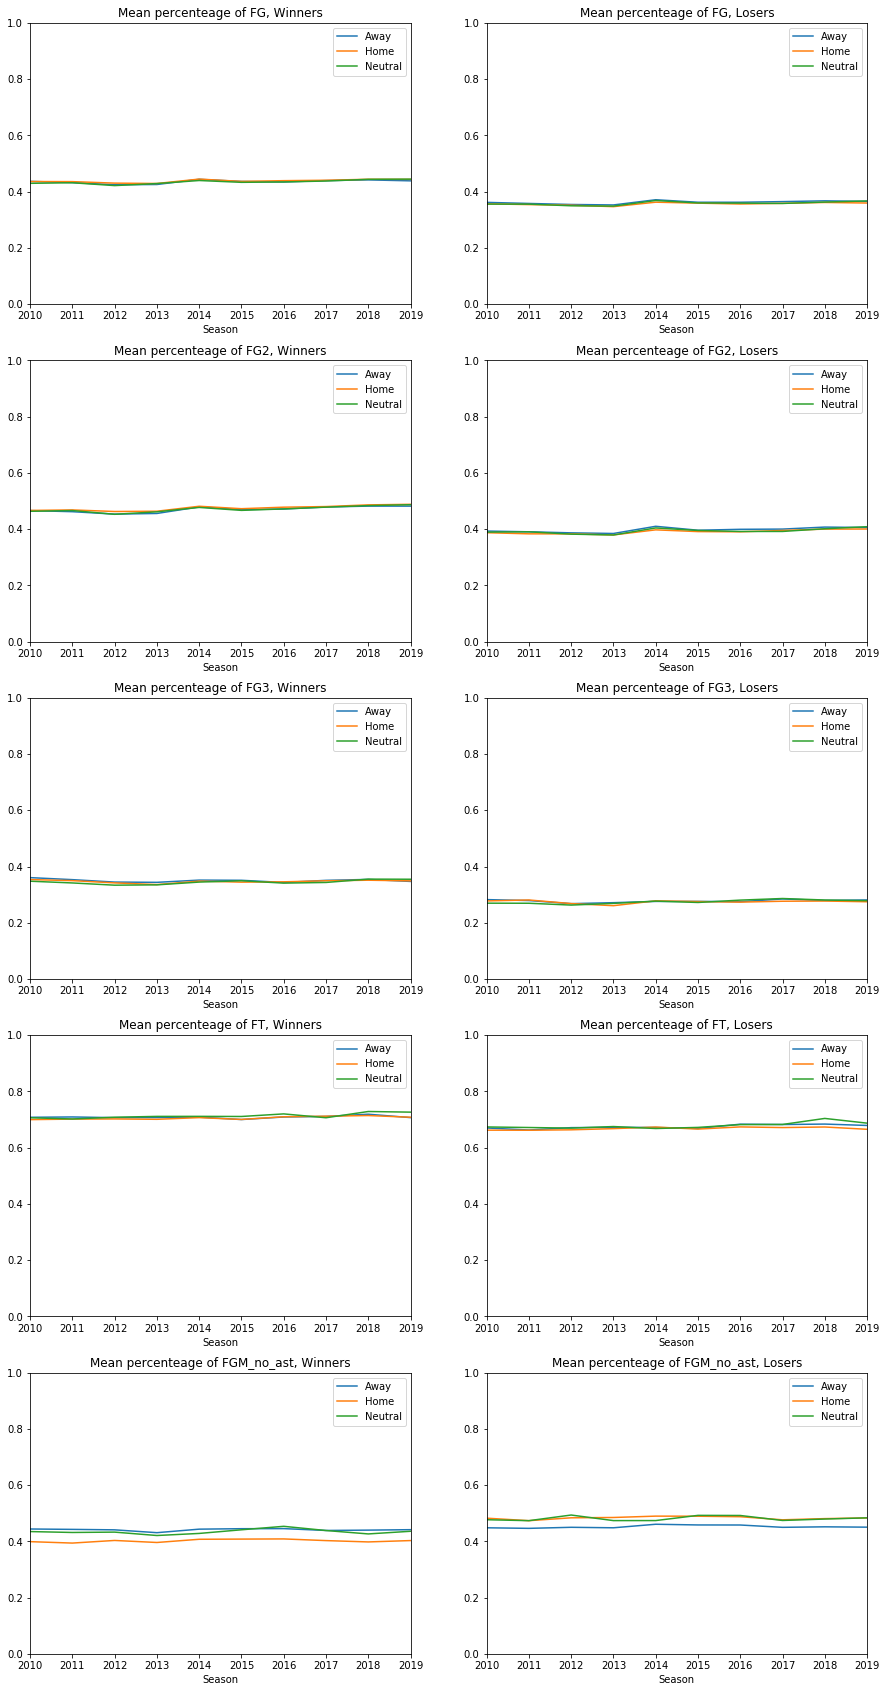

In [51]:
fig, ax= plt.subplots(5,2, figsize=(15, 6*5))

i = 0

for col in [c for c in summaries.columns if '_perc_mean' in c and c.startswith('W')]:
    name = col.split('_perc_')[0][1:]
    summaries[col].unstack().plot(title='Mean percenteage of '+name+', Winners',ax=ax[i][0])
    summaries['L'+name+'_perc_mean'].unstack().plot(title='Mean percenteage of '+name+', Losers',ax=ax[i][1])
    ax[i][0].legend(labels=['Away', 'Home', 'Neutral'])
    ax[i][1].legend(labels=['Away', 'Home', 'Neutral'])
    ax[i][0].set_ylim(0,1)
    ax[i][1].set_ylim(0,1)
    i += 1

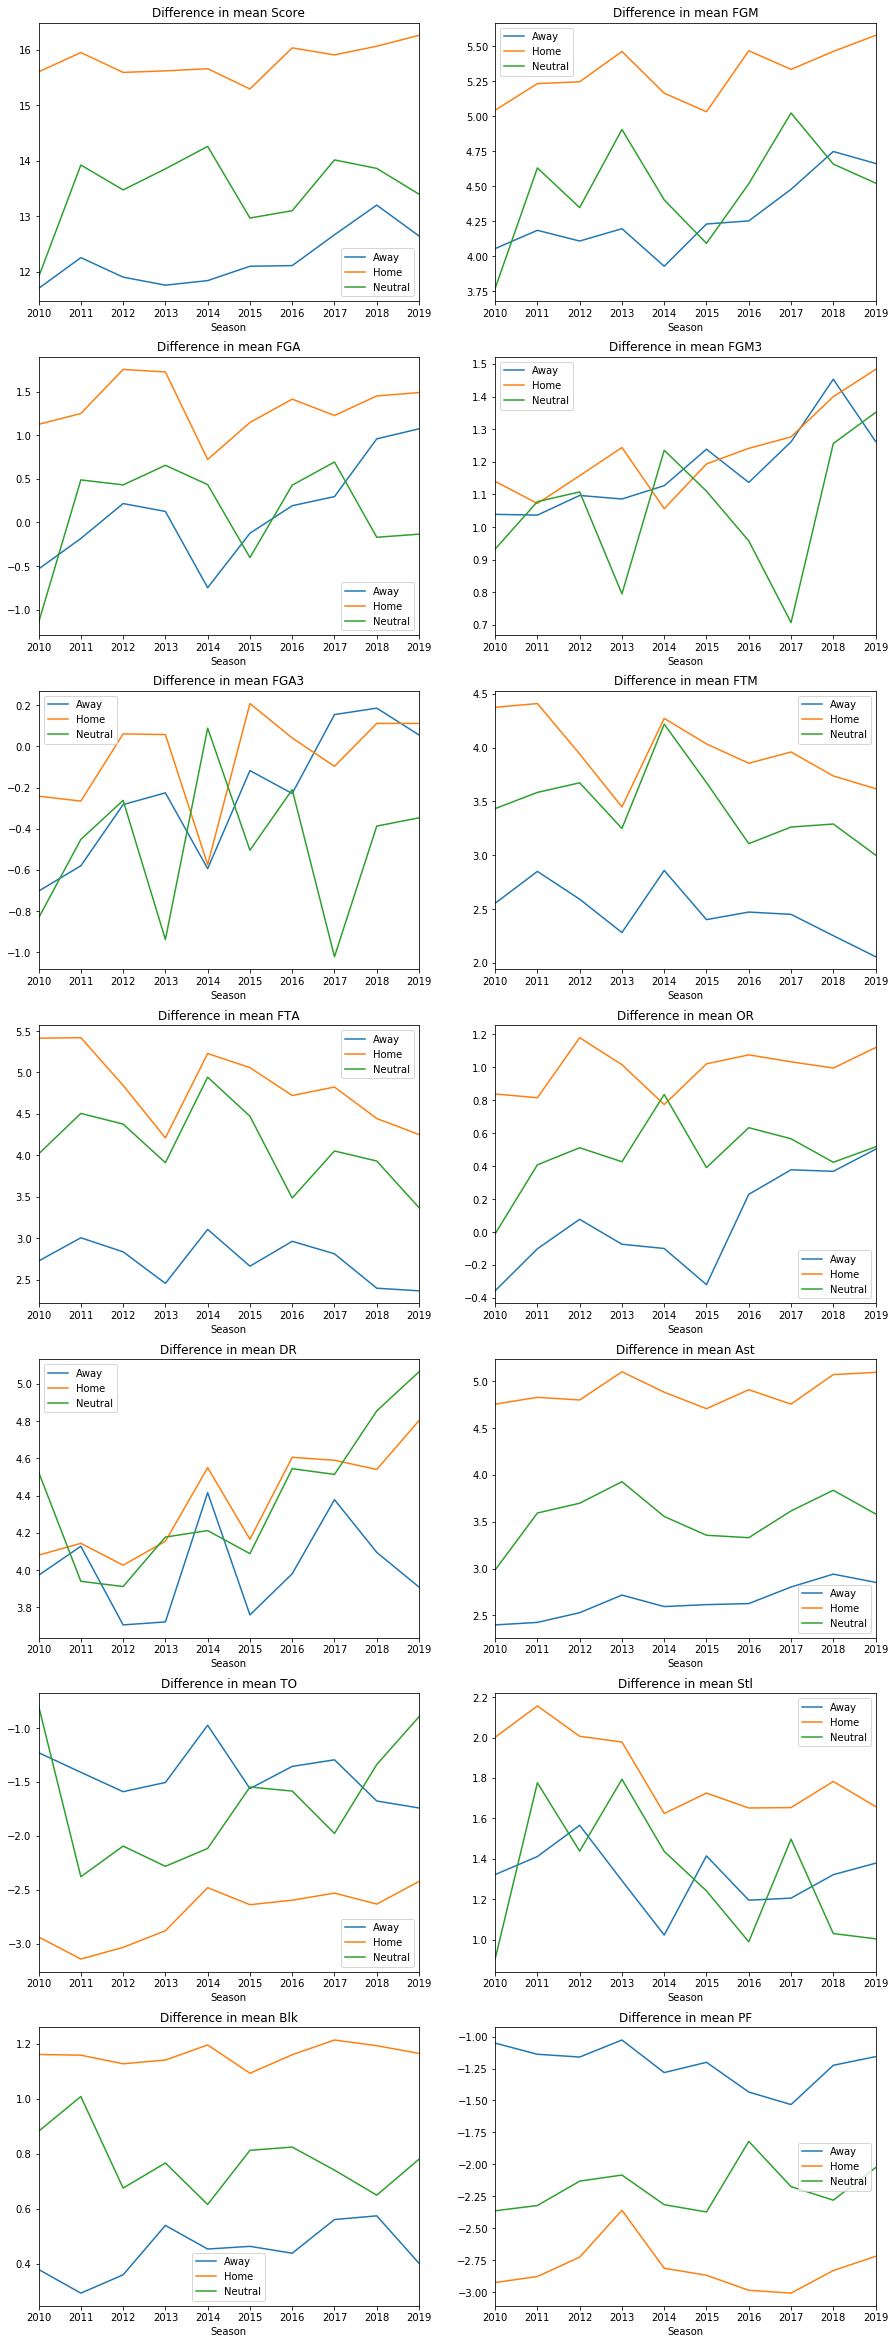

In [52]:
fig, ax= plt.subplots(7,2, figsize=(15, 6*7))

i, j = 0, 0

for col in stats:
    name = col[1:]
    summaries[[c for c in summaries.columns if name+'_diff_mean' in c]].unstack().plot(title='Difference in mean '+name,ax=ax[i][j])
    ax[i][j].legend(labels=['Away', 'Home', 'Neutral'])
    if j == 0:
        j = 1
    else:
        j = 0
        i += 1

In [53]:
playoff = pd.read_csv('data/raw_women/Stage2WDataFiles/WNCAATourneyDetailedResults.csv')

stats = [col for col in playoff.columns if 'W' in col and 'ID' not in col and 'Loc' not in col]

playoff= process_details(playoff)

playoff.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,WFGM3,WFGA3,WFTM,WFTA,WOR,WDR,WAst,WTO,WStl,WBlk,WPF,LFGM,LFGA,LFGM3,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF,WFG_perc,WFGM2,WFGA2,WFG2_perc,WFG3_perc,WFT_perc,WTot_Reb,WFGM_no_ast,WFGM_no_ast_perc,Wpossessions,Woff_rating,Wscoring_opp,WTO_perposs,LFG_perc,LFGM2,LFGA2,LFG2_perc,LFG3_perc,LFT_perc,LTot_Reb,LFGM_no_ast,LFGM_no_ast_perc,Lpossessions,Loff_rating,Lscoring_opp,LTO_perposs,Wdef_rating,Ldef_rating,Wimpact,Limpact,WDef_effort,LDef_effort,WReb_opp,LReb_opp,Score_diff,FGM_diff,FGA_diff,FGM3_diff,FGA3_diff,FTM_diff,FTA_diff,OR_diff,DR_diff,Ast_diff,TO_diff,Stl_diff,Blk_diff,PF_diff,FGM2_diff,FGA2_diff,Tot_Reb_diff,FGM_no_ast_diff,Def_effort_diff,Reb_opp_diff,possessions_diff,off_rating_diff,def_rating_diff,scoring_opp_diff,TO_perposs_diff,impact_diff
0,2010,138,3124,69,3201,55,N,0,28,57,1,5,12,19,13,24,22,12,6,2,12,21,61,10,34,3,5,17,19,12,18,4,1,18,0.491228,27,52,0.519231,0.200000,0.631579,37,6,0.214286,46.975,146.886642,1.405535,0.255455,0.344262,11,27,0.407407,0.294118,0.600000,36,9,0.428571,59.625,92.243187,1.062893,0.301887,92.243187,146.886642,0.673640,0.326360,70.311475,62.526316,0.600000,0.655172,14,7,-4,-9,-29,9,14,-4,5,10,-6,2,1,-6,16,25,1,-3,7.785160,-0.055172,-12.650,54.643455,-54.643455,0.342642,-0.046432,0.347280
1,2010,138,3173,67,3395,66,N,0,23,59,9,26,12,19,13,34,13,16,3,10,14,22,73,8,27,14,15,18,26,8,8,8,6,22,0.389831,14,33,0.424242,0.346154,0.631579,47,10,0.434783,52.975,126.474752,1.284096,0.302029,0.301370,14,46,0.304348,0.296296,0.933333,44,14,0.636364,55.875,118.120805,1.434004,0.143177,118.120805,126.474752,0.608511,0.391489,99.890411,91.644068,0.666667,0.722222,1,1,-14,1,-1,-2,4,-5,8,5,8,-5,4,-8,0,-13,3,-4,8.246343,-0.055556,-2.900,8.353947,-8.353947,-0.149908,0.158853,0.217021
2,2010,138,3181,72,3214,37,H,0,26,57,4,13,16,22,13,34,15,11,10,7,11,15,56,4,15,3,8,10,21,4,16,6,4,20,0.456140,22,44,0.500000,0.307692,0.727273,47,11,0.423077,44.550,161.616162,1.514029,0.246914,0.267857,11,41,0.268293,0.266667,0.375000,31,11,0.733333,58.200,63.573883,1.027491,0.274914,63.573883,161.616162,0.911765,0.088235,85.464286,75.052632,0.829268,0.677419,35,11,1,0,-2,13,14,3,13,11,-5,4,3,-9,11,3,16,0,10.411654,0.151849,-13.650,98.042278,-98.042278,0.486538,-0.028001,0.823529
3,2010,138,3199,75,3256,61,H,0,25,63,3,15,22,26,20,27,13,17,8,3,21,21,62,2,20,17,22,16,21,13,16,5,4,24,0.396825,22,48,0.458333,0.200000,0.846154,47,12,0.480000,47.650,157.397692,1.581322,0.356768,0.338710,19,42,0.452381,0.100000,0.772727,37,8,0.380952,51.550,118.331717,1.405432,0.310378,118.331717,157.397692,0.641256,0.358744,96.935484,79.428571,0.658537,0.552632,14,4,1,1,-5,5,4,4,6,0,1,3,-1,-3,3,6,10,4,17.506912,0.105905,-3.900,39.065975,-39.065975,0.175891,0.046390,0.282511
4,2010,138,3207,62,3265,42,N,0,24,68,8,25,6,8,20,29,16,8,5,5,18,13,60,5,26,11,17,16,22,9,10,3,4,12,0.352941,16,43,0.372093,0.320000,0.750000,49,8,0.333333,52.200,118.773946,1.375479,0.153257,0.216667,8,34,0.235294,0.192308,0.647059,38,4,0.307692,45.925,91.453457,1.482308,0.217746,91.453457,118.773946,0.742331,0.257669,106.433333,70.588235,0.617021,0.500000,20,11,8,3,-1,-5,-9,4,7,7,-2,2,1,6,8,9,11,4,35.845098,0.117021,6.275,27.320490,-27.320490,-0.106829,-0.064490,0.484663


In [54]:
not_sum = ['WTeamID', 'DayNum', 'LTeamID']
to_sum = [col for col in playoff.columns if col not in not_sum]

summaries = playoff[to_sum].groupby(['Season']).agg(['min', 'max', 'mean', 'median', 'count'])

summaries.columns = ['_'.join(col).strip() for col in summaries.columns.values]
summaries

,WScore_min,WScore_max,WScore_mean,WScore_median,WScore_count,LScore_min,LScore_max,LScore_mean,LScore_median,LScore_count,NumOT_min,NumOT_max,NumOT_mean,NumOT_median,NumOT_count,WFGM_min,WFGM_max,WFGM_mean,WFGM_median,WFGM_count,WFGA_min,WFGA_max,WFGA_mean,WFGA_median,WFGA_count,WFGM3_min,WFGM3_max,WFGM3_mean,WFGM3_median,WFGM3_count,WFGA3_min,WFGA3_max,WFGA3_mean,WFGA3_median,WFGA3_count,WFTM_min,WFTM_max,WFTM_mean,WFTM_median,WFTM_count,WFTA_min,WFTA_max,WFTA_mean,WFTA_median,WFTA_count,WOR_min,WOR_max,WOR_mean,WOR_median,WOR_count,WDR_min,WDR_max,WDR_mean,WDR_median,WDR_count,WAst_min,WAst_max,WAst_mean,WAst_median,WAst_count,WTO_min,WTO_max,WTO_mean,WTO_median,WTO_count,WStl_min,WStl_max,WStl_mean,WStl_median,WStl_count,WBlk_min,WBlk_max,WBlk_mean,WBlk_median,WBlk_count,WPF_min,WPF_max,WPF_mean,WPF_median,WPF_count,LFGM_min,LFGM_max,LFGM_mean,LFGM_median,LFGM_count,LFGA_min,LFGA_max,LFGA_mean,LFGA_median,LFGA_count,LFGM3_min,LFGM3_max,LFGM3_mean,LFGM3_median,LFGM3_count,LFGA3_min,LFGA3_max,LFGA3_mean,LFGA3_median,LFGA3_count,LFTM_min,LFTM_max,LFTM_mean,LFTM_median,LFTM_count,LFTA_min,LFTA_max,LFTA_mean,LFTA_median,LFTA_count,LOR_min,LOR_max,LOR_mean,LOR_median,LOR_count,LDR_min,LDR_max,LDR_mean,LDR_median,LDR_count,LAst_min,LAst_max,LAst_mean,LAst_median,LAst_count,LTO_min,LTO_max,LTO_mean,LTO_median,LTO_count,LStl_min,LStl_max,LStl_mean,LStl_median,LStl_count,LBlk_min,LBlk_max,LBlk_mean,LBlk_median,LBlk_count,LPF_min,LPF_max,LPF_mean,LPF_median,LPF_count,WFG_perc_min,WFG_perc_max,WFG_perc_mean,WFG_perc_median,WFG_perc_count,...,WDef_effort_min,WDef_effort_max,WDef_effort_mean,WDef_effort_median,WDef_effort_count,LDef_effort_min,LDef_effort_max,LDef_effort_mean,LDef_effort_median,LDef_effort_count,WReb_opp_min,WReb_opp_max,WReb_opp_mean,WReb_opp_median,WReb_opp_count,LReb_opp_min,LReb_opp_max,LReb_opp_mean,LReb_opp_median,LReb_opp_count,Score_diff_min,Score_diff_max,Score_diff_mean,Score_diff_median,Score_diff_count,FGM_diff_min,FGM_diff_max,FGM_diff_mean,FGM_diff_median,FGM_diff_count,FGA_diff_min,FGA_diff_max,FGA_diff_mean,FGA_diff_median,FGA_diff_count,FGM3_diff_min,FGM3_diff_max,FGM3_diff_mean,FGM3_diff_median,FGM3_diff_count,FGA3_diff_min,FGA3_diff_max,FGA3_diff_mean,FGA3_diff_median,FGA3_diff_count,FTM_diff_min,FTM_diff_max,FTM_diff_mean,FTM_diff_median,FTM_diff_count,FTA_diff_min,FTA_diff_max,FTA_diff_mean,FTA_diff_median,FTA_diff_count,OR_diff_min,OR_diff_max,OR_diff_mean,OR_diff_median,OR_diff_count,DR_diff_min,DR_diff_max,DR_diff_mean,DR_diff_median,DR_diff_count,Ast_diff_min,Ast_diff_max,Ast_diff_mean,Ast_diff_median,Ast_diff_count,TO_diff_min,TO_diff_max,TO_diff_mean,TO_diff_median,TO_diff_count,Stl_diff_min,Stl_diff_max,Stl_diff_mean,Stl_diff_median,Stl_diff_count,Blk_diff_min,Blk_diff_max,Blk_diff_mean,Blk_diff_median,Blk_diff_count,PF_diff_min,PF_diff_max,PF_diff_mean,PF_diff_median,PF_diff_count,FGM2_diff_min,FGM2_diff_max,FGM2_diff_mean,FGM2_diff_median,FGM2_diff_count,FGA2_diff_min,FGA2_diff_max,FGA2_diff_mean,FGA2_diff_median,FGA2_diff_count,Tot_Reb_diff_min,Tot_Reb_diff_max,Tot_Reb_diff_mean,Tot_Reb_diff_median,Tot_Reb_diff_count,FGM_no_ast_diff_min,FGM_no_ast_diff_max,FGM_no_ast_diff_mean,FGM_no_ast_diff_median,FGM_no_ast_diff_count,Def_effort_diff_min,Def_effort_diff_max,Def_effort_diff_mean,Def_effort_diff_median,Def_effort_diff_count,Reb_opp_diff_min,Reb_opp_diff_max,Reb_opp_diff_mean,Reb_opp_diff_median,Reb_opp_diff_count,possessions_diff_min,possessions_diff_max,possessions_diff_mean,possessions_diff_median,possessions_diff_count,off_rating_diff_min,off_rating_diff_max,off_rating_diff_mean,off_rating_diff_median,off_rating_diff_count,def_rating_diff_min,def_rating_diff_max,def_rating_diff_mean,def_rating_diff_median,def_rating_diff_count,scoring_opp_diff_min,scoring_opp_diff_max,scoring_opp_diff_mean,scoring_opp_diff_median,scoring_opp_diff_count,TO_perposs_diff_min,TO_perposs_diff_max,TO_perposs_diff_mean,TO_perposs_diff_median,TO_perposs_diff_count,impact_diff_min,impact_diff_max,impact_diff_me

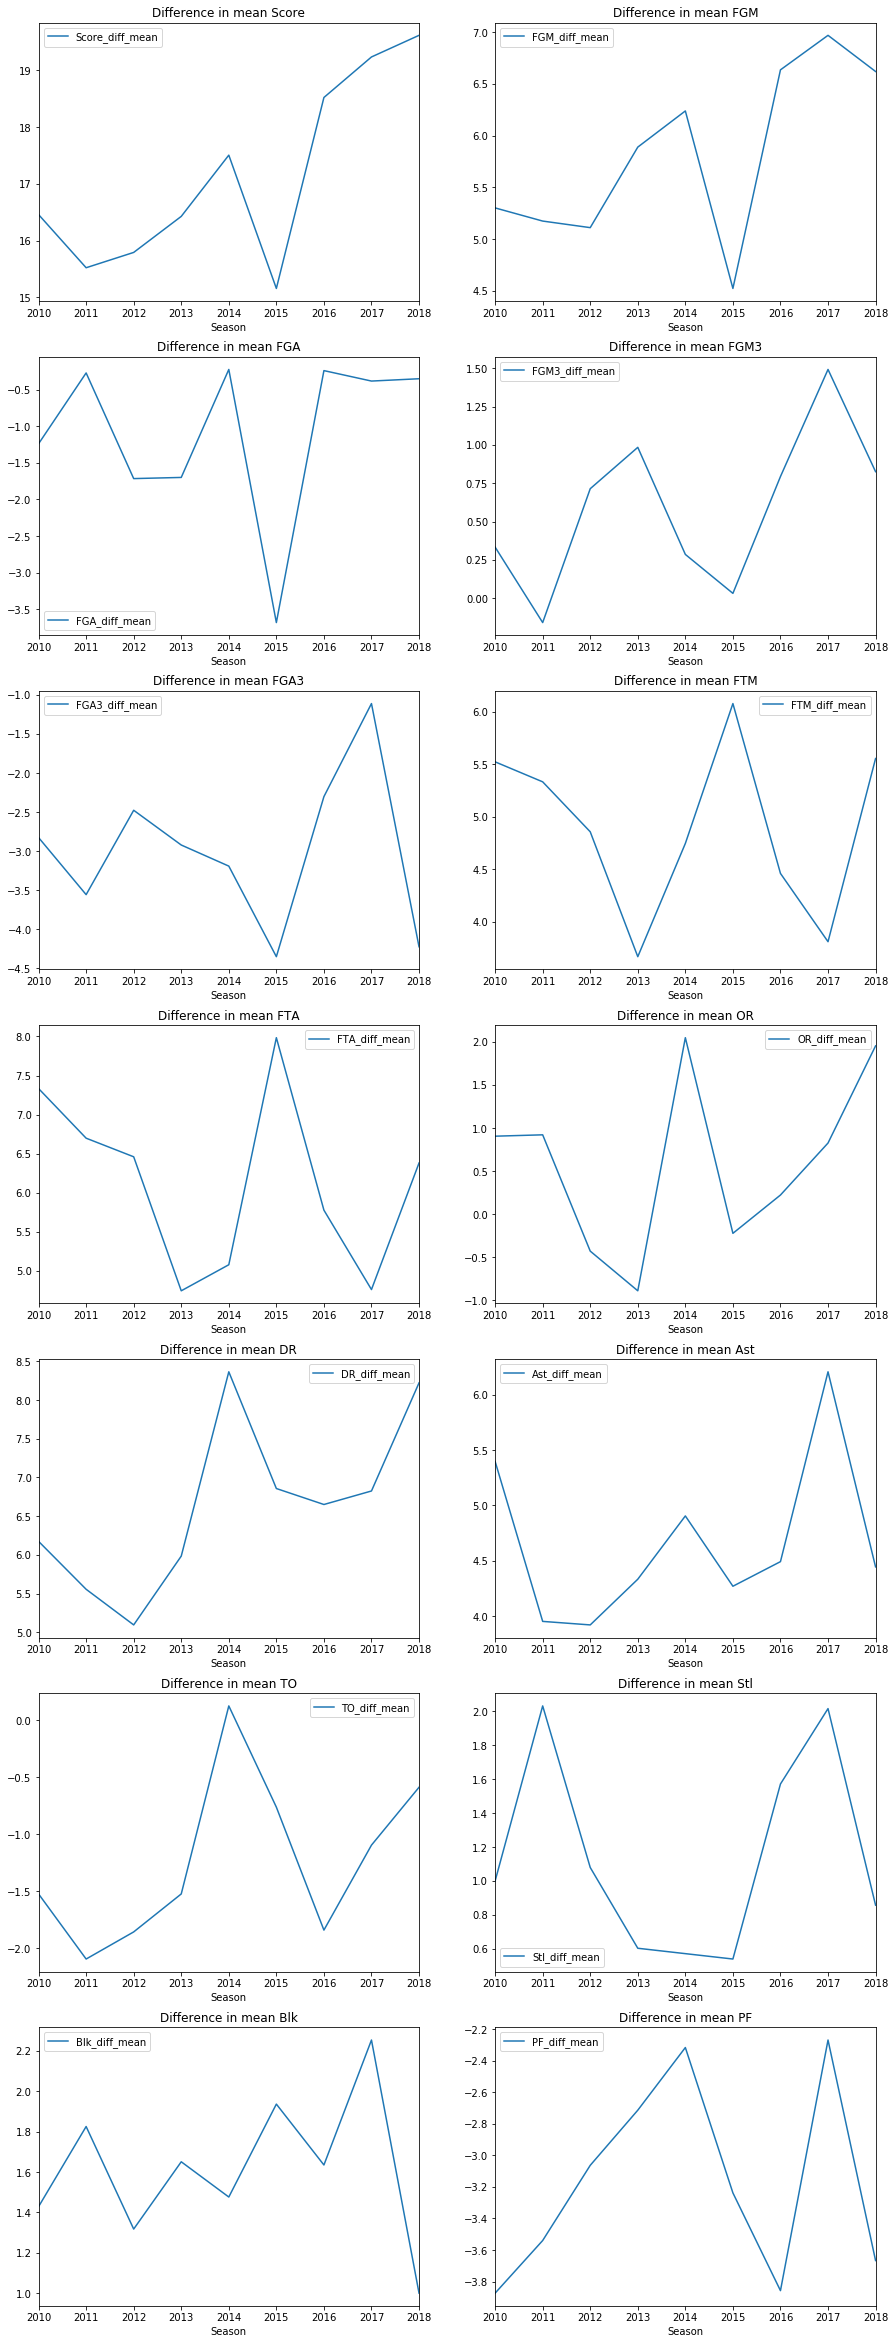

In [55]:
fig, ax= plt.subplots(7,2, figsize=(15, 6*7))

i, j = 0, 0

for col in stats:
    name = col[1:]
    summaries[[c for c in summaries.columns if name+'_diff_mean' in c]].plot(title='Difference in mean '+name,ax=ax[i][j])
    if j == 0:
        j = 1
    else:
        j = 0
        i += 1

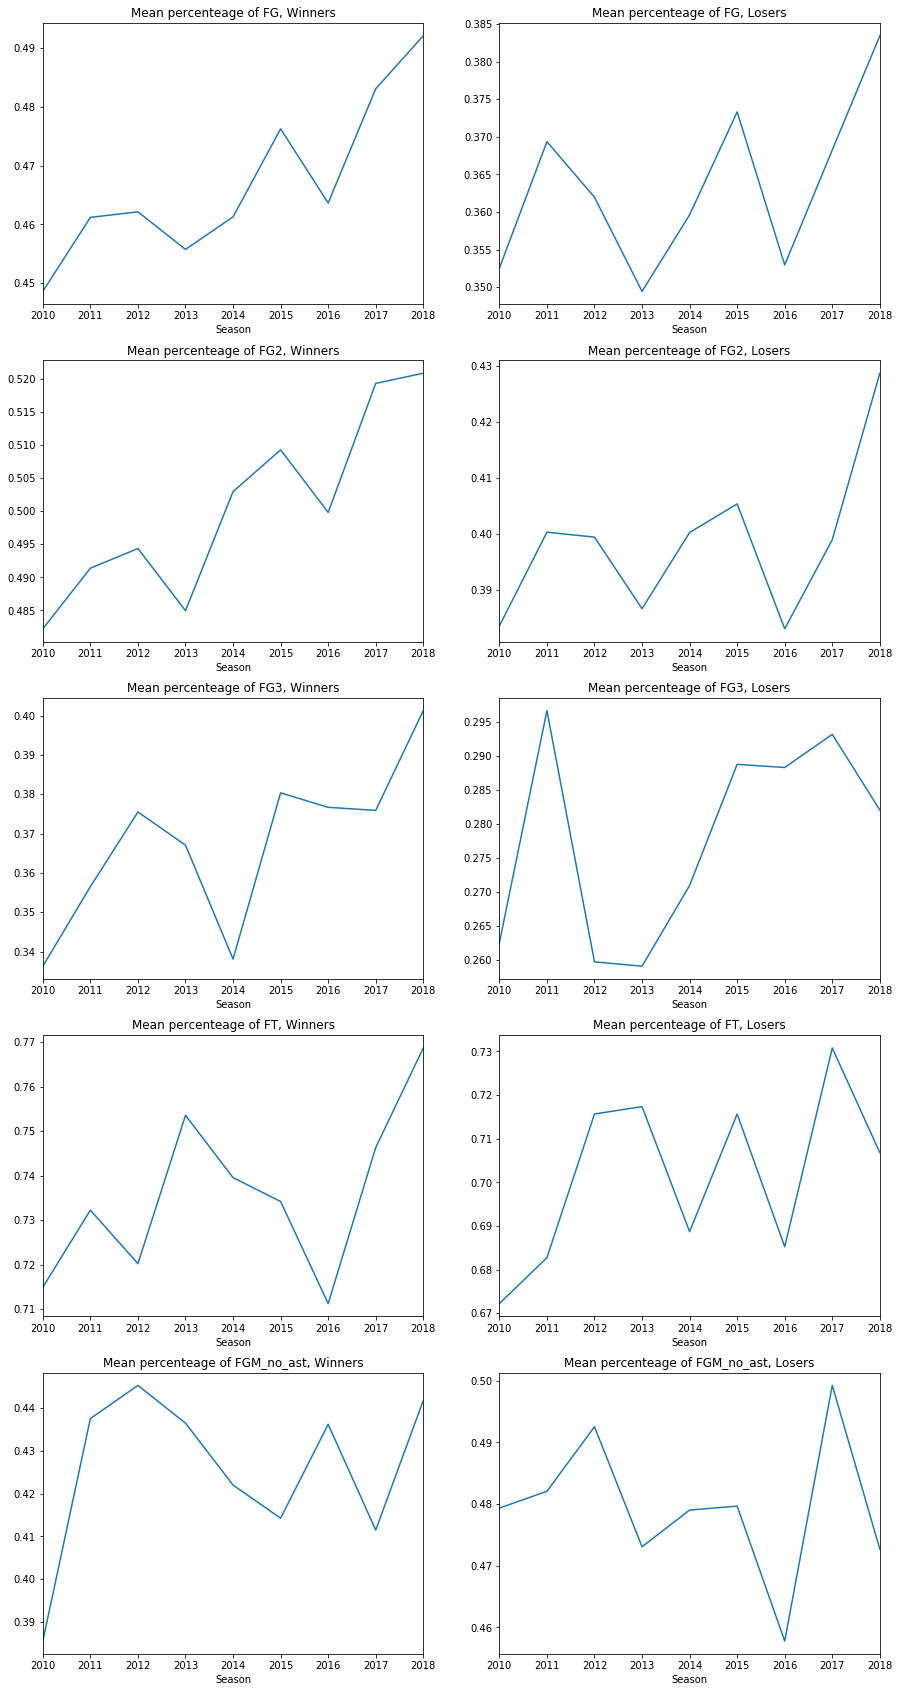

In [56]:
fig, ax= plt.subplots(5,2, figsize=(15, 6*5))

i = 0

for col in [c for c in summaries.columns if '_perc_mean' in c and c.startswith('W')]:
    name = col.split('_perc_')[0][1:]
    summaries[col].plot(title='Mean percenteage of '+name+', Winners',ax=ax[i][0])
    summaries['L'+name+'_perc_mean'].plot(title='Mean percenteage of '+name+', Losers',ax=ax[i][1])
    i += 1

# Seeds

In [58]:
[col for col in women_comp if 'Seed' in col]

['data/raw_women/WDataFiles/WNCAATourneySeeds.csv',
 'data/raw_women/Stage2WDataFiles/WNCAATourneySeeds.csv']

In [59]:
seeds = pd.read_csv('data/raw_women/Stage2WDataFiles/WNCAATourneySeeds.csv')
seeds.head()

,Season,Seed,TeamID
0,1998,W01,3330
1,1998,W02,3163
2,1998,W03,3112
3,1998,W04,3301
4,1998,W05,3272


# Putting things together

In [62]:
reg_season.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,WFGM3,WFGA3,WFTM,WFTA,WOR,WDR,WAst,WTO,WStl,WBlk,WPF,LFGM,LFGA,LFGM3,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF,WFG_perc,WFGM2,WFGA2,WFG2_perc,WFG3_perc,WFT_perc,WTot_Reb,WFGM_no_ast,WFGM_no_ast_perc,Wpossessions,Woff_rating,Wscoring_opp,WTO_perposs,LFG_perc,LFGM2,LFGA2,LFG2_perc,LFG3_perc,LFT_perc,LTot_Reb,LFGM_no_ast,LFGM_no_ast_perc,Lpossessions,Loff_rating,Lscoring_opp,LTO_perposs,Wdef_rating,Ldef_rating,Wimpact,Limpact,WDef_effort,LDef_effort,WReb_opp,LReb_opp,Score_diff,FGM_diff,FGA_diff,FGM3_diff,FGA3_diff,FTM_diff,FTA_diff,OR_diff,DR_diff,Ast_diff,TO_diff,Stl_diff,Blk_diff,PF_diff,FGM2_diff,FGA2_diff,Tot_Reb_diff,FGM_no_ast_diff,Def_effort_diff,Reb_opp_diff,possessions_diff,off_rating_diff,def_rating_diff,scoring_opp_diff,TO_perposs_diff,impact_diff
0,2010,11,3103,63,3237,49,H,0,23,54,5,9,12,19,10,26,14,18,7,0,15,20,54,3,13,6,10,11,27,11,23,7,6,19,0.425926,18,45,0.400000,0.555556,0.631579,36,9,0.391304,52.975,118.924021,1.189712,0.339783,0.370370,17,41,0.414634,0.230769,0.600000,38,9,0.450000,61.250,80.000000,0.959184,0.375510,80.000000,118.924021,0.576744,0.423256,69.759259,73.500000,0.764706,0.870968,14,3,0,2,-4,6,9,-1,-1,3,-5,0,-6,-4,1,4,-2,0,-3.740741,-0.106262,-8.275,38.924021,-38.924021,0.230528,-0.035727,0.153488
1,2010,11,3104,73,3399,68,N,0,26,62,5,12,16,28,16,31,15,20,5,2,25,25,63,4,21,14,27,14,26,7,20,4,2,27,0.419355,21,50,0.420000,0.416667,0.571429,47,11,0.423077,52.700,138.519924,1.428843,0.379507,0.396825,21,42,0.500000,0.190476,0.518519,40,18,0.720000,56.175,121.050289,1.349800,0.356030,121.050289,138.519924,0.631579,0.368421,109.333333,89.322581,0.815789,0.722222,5,1,-1,1,-9,2,1,2,5,8,0,1,0,-2,0,8,7,-7,20.010753,0.093567,-3.475,17.469635,-17.469635,0.079043,0.023476,0.263158
2,2010,11,3110,71,3224,59,A,0,29,62,6,15,7,12,14,23,18,13,6,2,17,19,58,2,14,19,23,17,23,8,15,6,0,15,0.467742,23,47,0.489362,0.400000,0.583333,37,11,0.379310,55.300,128.390597,1.224231,0.235081,0.327586,17,44,0.386364,0.142857,0.826087,40,11,0.578947,45.075,130.892956,1.529118,0.332779,130.892956,128.390597,0.604255,0.395745,84.448276,63.516129,0.589744,0.696970,12,10,4,4,1,-12,-11,-3,0,10,-2,0,2,2,6,3,-3,0,20.932147,-0.107226,10.225,-2.502359,2.502359,-0.304887,-0.097697,0.208511
3,2010,11,3111,63,3267,58,A,0,27,52,4,11,5,9,6,40,14,27,5,10,18,18,74,6,26,16,25,22,22,15,11,14,5,14,0.519231,23,41,0.560976,0.363636,0.555556,46,13,0.481481,68.725,91.669698,0.818843,0.392870,0.243243,12,48,0.250000,0.230769,0.640000,44,3,0.166667,51.125,113.447433,1.679707,0.215159,113.447433,91.669698,0.656126,0.343874,123.054054,58.634615,0.714286,0.880000,5,9,-22,-2,-15,-11,-16,-16,18,-1,16,-9,5,4,11,-7,2,10,64.419439,-0.165714,17.600,-21.777735,21.777735,-0.860863,0.177711,0.312253
4,2010,11,3119,74,3447,70,H,1,30,74,7,20,7,11,14,33,18,11,5,3,18,25,74,9,17,11,21,21,32,12,14,4,2,14,0.405405,23,54,0.425926,0.350000,0.636364,47,12,0.400000,65.775,112.504751,1.204485,0.167237,0.337838,16,57,0.280702,0.529412,0.523810,53,13,0.520000,57.025,122.753178,1.472600,0.245506,122.753178,112.504751,0.562016,0.437984,95.000000,87.189189,0.673469,0.727273,4,5,0,-2,3,-4,-10,-7,1,6,-3,1,1,4,7,-3,-6,-1,7.810811,-0.053803,8.750,-10.248427,10.248427,-0.268115,-0.078270,0.124031


In [63]:
reg_s = full_stats(reg_season)
reg_s.head()

,Season,TeamID,Score,FGM,FGA,FGM3,FGA3,FTM,FTA,OR,DR,Ast,TO,Stl,Blk,PF,FGM2,FGA2,Tot_Reb,FGM_no_ast,possessions,off_rating,scoring_opp,TO_perposs,def_rating,impact,Def_effort,Reb_opp,Score_diff,FGM_diff,FGA_diff,FGM3_diff,FGA3_diff,FTM_diff,FTA_diff,OR_diff,DR_diff,Ast_diff,TO_diff,Stl_diff,Blk_diff,PF_diff,FGM2_diff,FGA2_diff,Tot_Reb_diff,FGM_no_ast_diff,Def_effort_diff,Reb_opp_diff,possessions_diff,off_rating_diff,def_rating_diff,scoring_opp_diff,TO_perposs_diff,impact_diff,N_wins,FGM_perc,FGM2_perc,FGM3_perc,FT_perc,FGM_no_ast_perc
0,2010,3102,51.821429,19.142857,53.142857,4.571429,16.071429,8.964286,13.214286,12.464286,19.535714,10.250000,17.714286,6.035714,0.642857,14.964286,14.571429,37.071429,32.000000,8.892857,52.116071,101.137244,1.157146,0.341068,143.003280,0.322078,66.425849,0.673014,-19.964286,-7.857143,-3.250000,-3.142857,-4.428571,-1.107143,-1.678571,-0.357143,-4.321429,-9.285714,3.321429,-3.785714,-4.392857,1.357143,-4.714286,1.178571,-4.678571,1.428571,-5.834646,-0.028518,1.225893,-41.866036,41.866036,-0.107667,0.055449,-0.355844,0.035714,0.360215,0.393064,0.284444,0.678378,0.464552
1,2010,3103,62.233333,22.233333,55.266667,3.933333,12.466667,13.833333,19.600000,14.200000,23.566667,13.433333,18.266667,8.033333,2.400000,17.533333,18.300000,42.800000,37.766667,8.800000,50.023333,126.163279,1.300458,0.370191,118.649547,0.531965,77.386595,0.696367,2.600000,1.266667,0.300000,-0.900000,-2.700000,0.966667,0.766667,0.566667,1.966667,1.733333,-0.433333,-1.200000,-1.400000,-0.100000,2.166667,3.000000,2.533333,-0.466667,4.837635,0.032045,-1.064167,7.513731,-7.513731,0.036547,0.001763,0.063930,0.566667,0.402292,0.427570,0.315508,0.705782,0.395802
2,2010,3104,64.137931,24.724138,62.103448,4.344828,14.724138,10.344828,16.793103,14.482759,25.931034,13.103448,19.172414,7.379310,2.931034,20.413793,20.379310,47.379310,40.413793,11.620690,58.816379,111.270938,1.208508,0.326739,129.795942,0.462641,85.607465,0.720761,-2.862069,0.827586,1.965517,-0.758621,-1.793103,-3.758621,-5.172414,-0.379310,-0.551724,0.586207,-0.068966,-1.379310,-0.655172,4.000000,1.586207,3.758621,-0.931034,0.241379,5.828421,0.008338,4.732759,-18.525004,18.525004,-0.146205,-0.041416,-0.074718,0.379310,0.398112,0.430131,0.295082,0.616016,0.470014
3,2010,3105,60.777778,20.370370,50.851852,3.037037,9.888889,17.000000,24.333333,13.666667,23.370370,9.740741,25.037037,8.777778,5.148148,19.148148,17.333333,40.962963,37.037037,10.629630,50.663889,123.854461,1.260153,0.506121,127.847418,0.493600,81.348850,0.682798,-3.962963,-2.407407,-6.666667,-0.703704,-2.888889,1.555556,0.814815,-1.518519,2.074074,-3.740741,4.296296,-3.444444,0.740741,-1.814815,-1.703704,-3.777778,0.555556,1.333333,7.267920,-0.028840,-1.238889,-3.992957,3.992957,-0.093081,0.101563,-0.012801,0.518519,0.400583,0.423146,0.307116,0.698630,0.521818
4,2010,3106,55.137931,18.448276,53.000000,2.689655,9.586207,15.551724,24.000000,15.000000,24.758621,11.482759,20.103448,8.034483,4.482759,22.068966,15.758621,43.413793,39.758621,6.965517,46.703448,125.463646,1.447552,0.435997,133.283619,0.498807,87.565245,0.766965,-2.275862,0.551724,2.310345,-1.034483,-2.241379,-2.344828,-2.655172,2.620690,1.344828,1.965517,1.793103,-0.758621,0.517241,2.000000,1.586207,4.551724,3.965517,-1.413793,7.577682,0.080433,2.743966,-7.819973,7.819973,-0.032253,0.007818,-0.002387,0.413793,0.348081,0.362986,0.280576,0.647989,0.377570


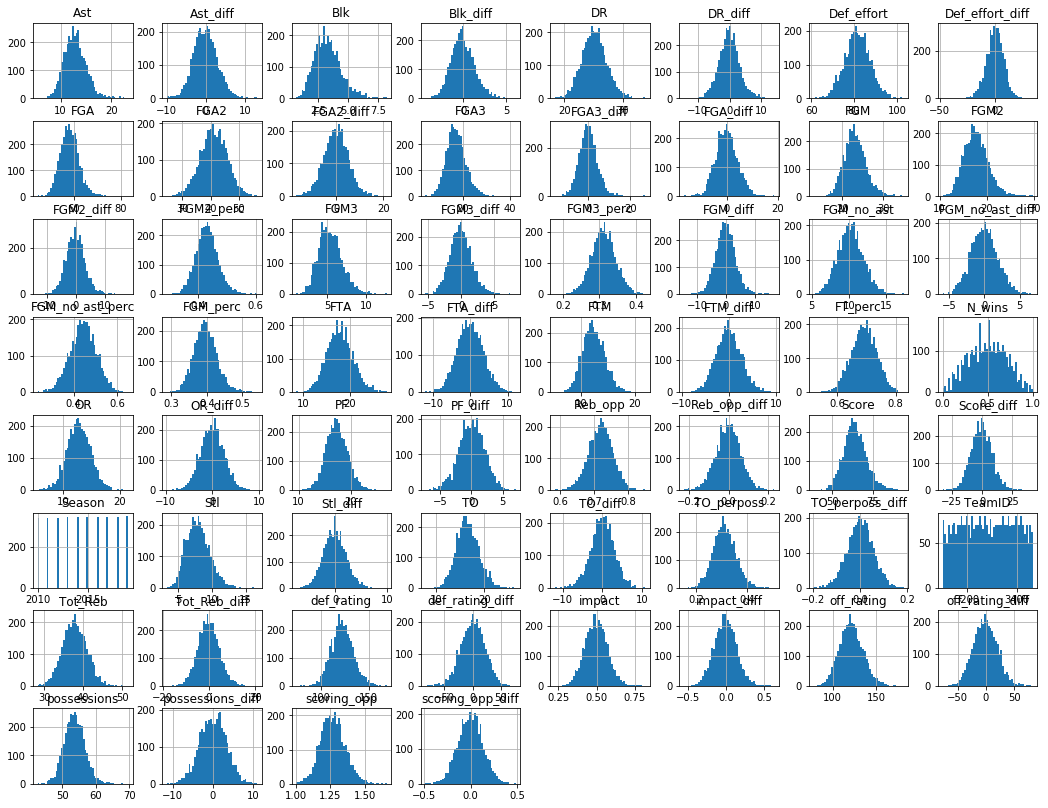

In [64]:
reg_s.hist(bins=50, figsize=(18, 14))
plt.show()

In [65]:
summary_reg = reg_s.groupby('Season')[[col for col in reg_s if col not in ['TeamID', 'Season']]].agg(['mean', 'max', 'min'])
summary_reg.columns = ['_'.join(col).strip() for col in summary_reg.columns.values]
summary_reg

,Score_mean,Score_max,Score_min,FGM_mean,FGM_max,FGM_min,FGA_mean,FGA_max,FGA_min,FGM3_mean,FGM3_max,FGM3_min,FGA3_mean,FGA3_max,FGA3_min,FTM_mean,FTM_max,FTM_min,FTA_mean,FTA_max,FTA_min,OR_mean,OR_max,OR_min,DR_mean,DR_max,DR_min,Ast_mean,Ast_max,Ast_min,TO_mean,TO_max,TO_min,Stl_mean,Stl_max,Stl_min,Blk_mean,Blk_max,Blk_min,PF_mean,PF_max,PF_min,FGM2_mean,FGM2_max,FGM2_min,FGA2_mean,FGA2_max,FGA2_min,Tot_Reb_mean,Tot_Reb_max,Tot_Reb_min,FGM_no_ast_mean,FGM_no_ast_max,FGM_no_ast_min,possessions_mean,possessions_max,possessions_min,off_rating_mean,off_rating_max,off_rating_min,scoring_opp_mean,scoring_opp_max,scoring_opp_min,TO_perposs_mean,TO_perposs_max,TO_perposs_min,def_rating_mean,def_rating_max,def_rating_min,impact_mean,impact_max,impact_min,Def_effort_mean,Def_effort_max,Def_effort_min,Reb_opp_mean,Reb_opp_max,Reb_opp_min,Score_diff_mean,Score_diff_max,Score_diff_min,FGM_diff_mean,FGM_diff_max,FGM_diff_min,FGA_diff_mean,FGA_diff_max,FGA_diff_min,FGM3_diff_mean,FGM3_diff_max,FGM3_diff_min,FGA3_diff_mean,FGA3_diff_max,FGA3_diff_min,FTM_diff_mean,FTM_diff_max,FTM_diff_min,FTA_diff_mean,FTA_diff_max,FTA_diff_min,OR_diff_mean,OR_diff_max,OR_diff_min,DR_diff_mean,DR_diff_max,DR_diff_min,Ast_diff_mean,Ast_diff_max,Ast_diff_min,TO_diff_mean,TO_diff_max,TO_diff_min,Stl_diff_mean,Stl_diff_max,Stl_diff_min,Blk_diff_mean,Blk_diff_max,Blk_diff_min,PF_diff_mean,PF_diff_max,PF_diff_min,FGM2_diff_mean,FGM2_diff_max,FGM2_diff_min,FGA2_diff_mean,FGA2_diff_max,FGA2_diff_min,Tot_Reb_diff_mean,Tot_Reb_diff_max,Tot_Reb_diff_min,FGM_no_ast_diff_mean,FGM_no_ast_diff_max,FGM_no_ast_diff_min,Def_effort_diff_mean,Def_effort_diff_max,Def_effort_diff_min,Reb_opp_diff_mean,Reb_opp_diff_max,Reb_opp_diff_min,possessions_diff_mean,possessions_diff_max,possessions_diff_min,off_rating_diff_mean,off_rating_diff_max,off_rating_diff_min,def_rating_diff_mean,def_rating_diff_max,def_rating_diff_min,scoring_opp_diff_mean,scoring_opp_diff_max,scoring_opp_diff_min,TO_perposs_diff_mean,TO_perposs_diff_max,TO_perposs_diff_min,impact_diff_mean,impact_diff_max,impact_diff_min,N_wins_mean,N_wins_max,N_wins_min,FGM_perc_mean,FGM_perc_max,FGM_perc_min,FGM2_perc_mean,FGM2_perc_max,FGM2_perc_min,FGM3_perc_mean,FGM3_perc_max,FGM3_perc_min,FT_perc_mean,FT_perc_max,FT_perc_min,FGM_no_ast_perc_mean,FGM_no_ast_perc_max,FGM_no_ast_perc_min
Season,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2010,63.342031,86.900000,45.653846,22.693045,31.870968,16.172414,57.450312,72.857143,45.466667,5.177982,10.333333,1.909091,16.266444,29.620690,7.681818,12.777960,20.480000,6.233333,18.609178,27.400000,8.533333,13.251740,18.392857,6.656250,24.537901,31.062500,18.964286,12.684878,19.468750,6.142857,17.926954,26.000000,12.250000,8.382064,16.166667,4.807692,3.251082,7.250000,0.642857,17.245209,23.266667,12.562500,17.515063,27.000000,11.300000,41.183868,53.172414,25.233333,37.789641,46.551724,28.428571,10.008166,14.566667,5.566667,53.286168,63.090833,44.802586,121.620612,160.035929,88.514328,1.268418,1.529505,1.019561,0.339502,0.506121,0.245016,122.274402,158.171460,78.599211,0.497703,0.794500,0.263830,79.909643,94.794276,63.802053,0.712768,0.806634,0.617072,-0.278359,34.187500,-26.695652,-0.102654,13.250000,-11.933333,-0.058437,11.400000,-13.096774,-0.019929,5.966667,-3.444444,-0.014081,15.866667,-11.296296,-0.053123,8.640000,-7.565217,-0.067284,11.266667,-9.172414,-0.035541,6.592593,-6.275862,-0.069158,11.343750,-9.928571,-0.079888,10.718750,-9.285714,0.051675,10.103448,-8.300000,-0.041514,8.266667,-6.758621,-0.021664,5.375000,-4.392857,0.030857,4.766667,-5.966667,-0.082725,11.687500,-10.433333,-0.044355,12.633333,-17.000000,-0.104699,13.172414,-12.370370,-0.022765,6.586207,-4.066667,-0.074836,20.172010,-23.679180,-0.001085,0.194867,-0.165550,0.060740,8.218966,-10.118333,-0.653790,74.755969,-64.137322,0.653790,64.137322,-74.755969,-0.003175,0.392941,-0.462118,0.000

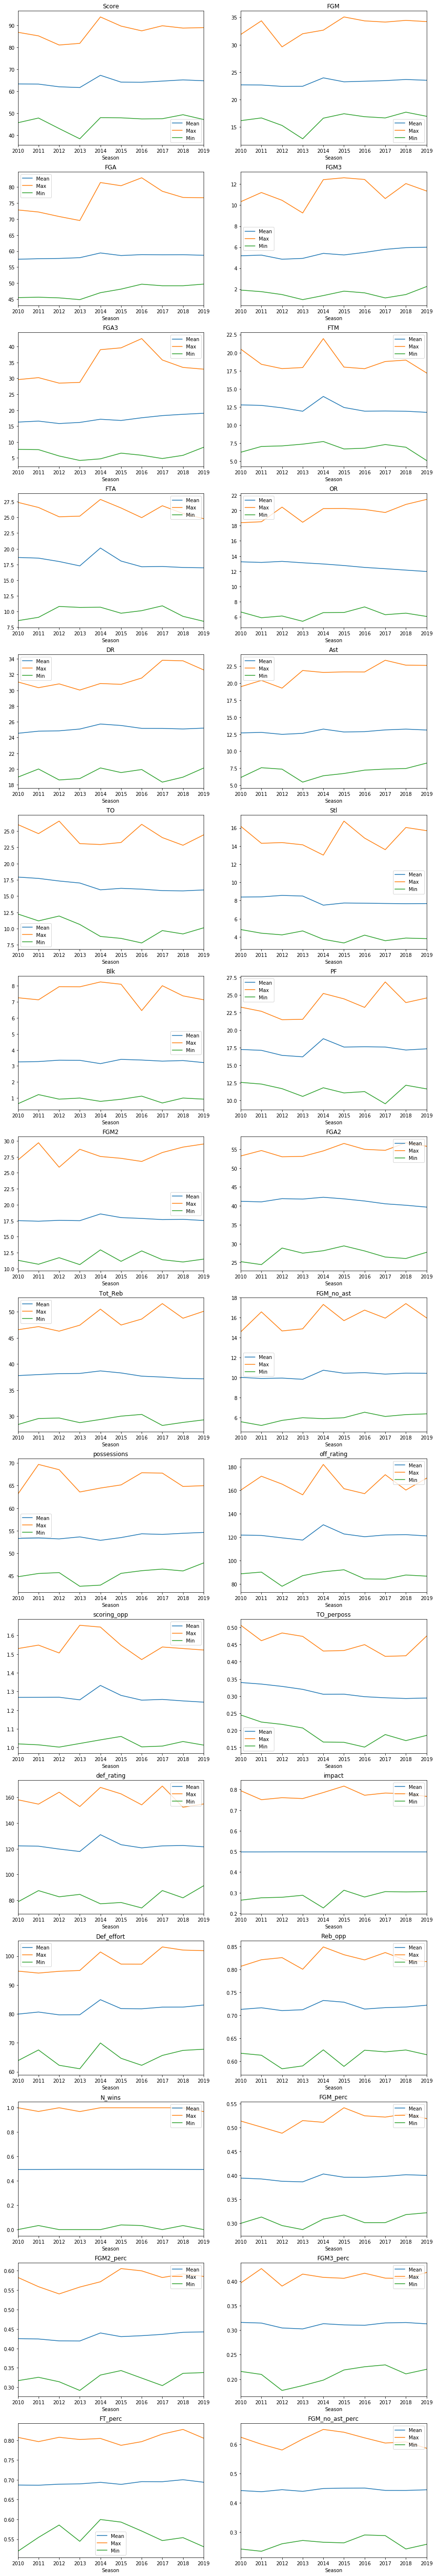

In [66]:
stats = [col.split('_mean')[0] for col in summary_reg if '_mean' in col and 'diff_' not in col]

fig, ax= plt.subplots(int(len(stats)/2),2, figsize=(15, 6*int(len(stats)/2)))

i, j = 0, 0

for col in stats:
    summary_reg[[col+'_mean', col+'_max', col+'_min']].plot(title=col,ax=ax[i][j])
    ax[i][j].legend(labels=['Mean', 'Max', 'Min'])
    if j == 0:
        j = 1
    else:
        j = 0
        i += 1

plt.show()

# Exploring training data (from Notebook 3) 

In [3]:
df = pd.read_csv('data/processed_women/training_data.csv')

df.head()

,Season,DayNum,Team1,Team2,target,target_points,T1_Loc,T2_Loc,ID,T1_Score,T1_FGM,T1_FGA,T1_FGM3,T1_FGA3,T1_FTM,T1_FTA,T1_OR,T1_DR,T1_Ast,T1_TO,T1_Stl,T1_Blk,T1_PF,T1_FGM2,T1_FGA2,T1_Tot_Reb,T1_FGM_no_ast,T1_possessions,T1_off_rating,T1_scoring_opp,T1_TO_perposs,T1_def_rating,T1_impact,T1_Def_effort,T1_Reb_opp,T1_Score_diff,T1_FGM_diff,T1_FGA_diff,T1_FGM3_diff,T1_FGA3_diff,T1_FTM_diff,T1_FTA_diff,T1_OR_diff,T1_DR_diff,T1_Ast_diff,T1_TO_diff,T1_Stl_diff,T1_Blk_diff,T1_PF_diff,T1_FGM2_diff,T1_FGA2_diff,T1_Tot_Reb_diff,T1_FGM_no_ast_diff,T1_Def_effort_diff,T1_Reb_opp_diff,T1_possessions_diff,T1_off_rating_diff,T1_def_rating_diff,T1_scoring_opp_diff,T1_TO_perposs_diff,T1_impact_diff,T1_N_wins,T1_FGM_perc,T1_FGM2_perc,T1_FGM3_perc,T1_FT_perc,T1_FGM_no_ast_perc,T1_L2W_Score,T1_L2W_FGM,T1_L2W_FGA,T1_L2W_FGM3,T1_L2W_FGA3,T1_L2W_FTM,T1_L2W_FTA,T1_L2W_OR,T1_L2W_DR,T1_L2W_Ast,T1_L2W_TO,T1_L2W_Stl,T1_L2W_Blk,T1_L2W_PF,T1_L2W_FGM2,T1_L2W_FGA2,T1_L2W_Tot_Reb,T1_L2W_FGM_no_ast,T1_L2W_possessions,T1_L2W_off_rating,T1_L2W_scoring_opp,T1_L2W_TO_perposs,T1_L2W_def_rating,T1_L2W_impact,T1_L2W_Def_effort,T1_L2W_Reb_opp,T1_L2W_Score_diff,T1_L2W_FGM_diff,T1_L2W_FGA_diff,T1_L2W_FGM3_diff,T1_L2W_FGA3_diff,T1_L2W_FTM_diff,T1_L2W_FTA_diff,T1_L2W_OR_diff,T1_L2W_DR_diff,T1_L2W_Ast_diff,T1_L2W_TO_diff,T1_L2W_Stl_diff,T1_L2W_Blk_diff,T1_L2W_PF_diff,T1_L2W_FGM2_diff,T1_L2W_FGA2_diff,T1_L2W_Tot_Reb_diff,T1_L2W_FGM_no_ast_diff,T1_L2W_Def_effort_diff,T1_L2W_Reb_opp_diff,T1_L2W_possessions_diff,T1_L2W_off_rating_diff,T1_L2W_def_rating_diff,T1_L2W_scoring_opp_diff,T1_L2W_TO_perposs_diff,T1_L2W_impact_diff,T1_L2W_N_wins,T1_L2W_FGM_perc,T1_L2W_FGM2_perc,T1_L2W_FGM3_perc,T1_L2W_FT_perc,T1_L2W_FGM_no_ast_perc,T1_Seed,T2_Score,T2_FGM,T2_FGA,T2_FGM3,T2_FGA3,T2_FTM,T2_FTA,T2_OR,T2_DR,T2_Ast,T2_TO,T2_Stl,T2_Blk,T2_PF,T2_FGM2,T2_FGA2,T2_Tot_Reb,T2_FGM_no_ast,T2_possessions,T2_off_rating,T2_scoring_opp,T2_TO_perposs,T2_def_rating,T2_impact,...,T2_L2W_FGM_diff,T2_L2W_FGA_diff,T2_L2W_FGM3_diff,T2_L2W_FGA3_diff,T2_L2W_FTM_diff,T2_L2W_FTA_diff,T2_L2W_OR_diff,T2_L2W_DR_diff,T2_L2W_Ast_diff,T2_L2W_TO_diff,T2_L2W_Stl_diff,T2_L2W_Blk_diff,T2_L2W_PF_diff,T2_L2W_FGM2_diff,T2_L2W_FGA2_diff,T2_L2W_Tot_Reb_diff,T2_L2W_FGM_no_ast_diff,T2_L2W_Def_effort_diff,T2_L2W_Reb_opp_diff,T2_L2W_possessions_diff,T2_L2W_off_rating_diff,T2_L2W_def_rating_diff,T2_L2W_scoring_opp_diff,T2_L2W_TO_perposs_diff,T2_L2W_impact_diff,T2_L2W_N_wins,T2_L2W_FGM_perc,T2_L2W_FGM2_perc,T2_L2W_FGM3_perc,T2_L2W_FT_perc,T2_L2W_FGM_no_ast_perc,T2_Seed,delta_Loc,delta_Score,delta_FGM,delta_FGA,delta_FGM3,delta_FGA3,delta_FTM,delta_FTA,delta_OR,delta_DR,delta_Ast,delta_TO,delta_Stl,delta_Blk,delta_PF,delta_FGM2,delta_FGA2,delta_Tot_Reb,delta_FGM_no_ast,delta_possessions,delta_off_rating,delta_scoring_opp,delta_TO_perposs,delta_def_rating,delta_impact,delta_Def_effort,delta_Reb_opp,delta_Score_diff,delta_FGM_diff,delta_FGA_diff,delta_FGM3_diff,delta_FGA3_diff,delta_FTM_diff,delta_FTA_diff,delta_OR_diff,delta_DR_diff,delta_Ast_diff,delta_TO_diff,delta_Stl_diff,delta_Blk_diff,delta_PF_diff,delta_FGM2_diff,delta_FGA2_diff,delta_Tot_Reb_diff,delta_FGM_no_ast_diff,delta_Def_effort_diff,delta_Reb_opp_diff,delta_possessions_diff,delta_off_rating_diff,delta_def_rating_diff,delta_scoring_opp_diff,delta_TO_perposs_diff,delta_impact_diff,delta_N_wins,delta_FGM_perc,delta_FGM2_perc,delta_FGM3_perc,delta_FT_perc,delta_FGM_no_ast_perc,delta_L2W_Score,delta_L2W_FGM,delta_L2W_FGA,delta_L2W_FGM3,delta_L2W_FGA3,delta_L2W_FTM,delta_L2W_FTA,delta_L2W_OR,delta_L2W_DR,delta_L2W_Ast,delta_L2W_TO,delta_L2W_Stl,delta_L2W_Blk,delta_L2W_PF,delta_L2W_FGM2,delta_L2W_FGA2,delta_L2W_Tot_Reb,delta_L2W_FGM_no_ast,delta_L2W_possessions,delta_L2W_off_rating,delta_L2W_scoring_opp,delta_L2W_TO_perposs,delta_L2W_def_rating,delta_L2W_impact,delta_L2W_Def_effort,delta_L2W_Reb_opp,delta_L2W_Score_diff,delta_L2W_FGM_diff,delta_L2W_FGA_diff,delta_L2W_FGM3_diff,delta_L2W_FGA3_diff,delta_L2W_FTM_diff,delta_L2W_FTA_diff,delta_L2W_OR_diff,delta_L2W_DR_diff,delta_L2W_Ast

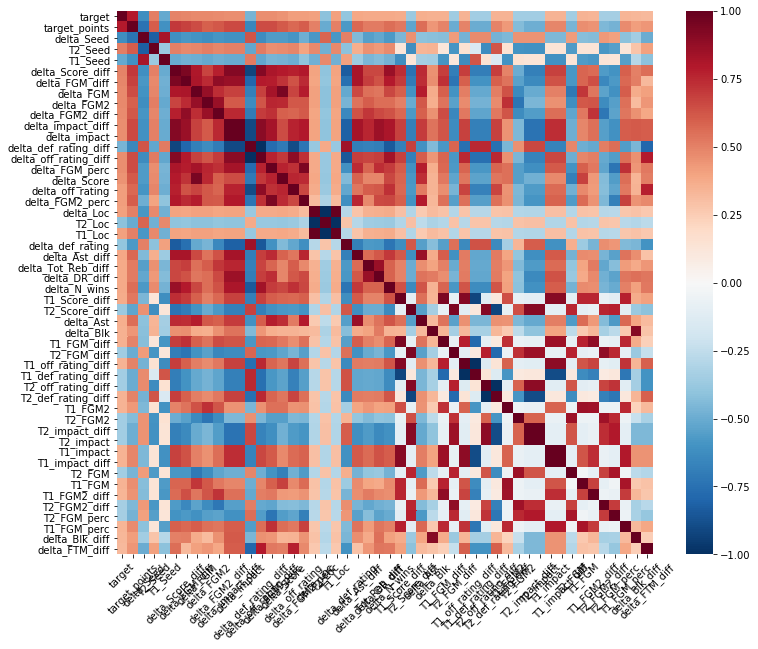

In [4]:
high_corr = exp.plot_correlations(df, target='target', limit=50)

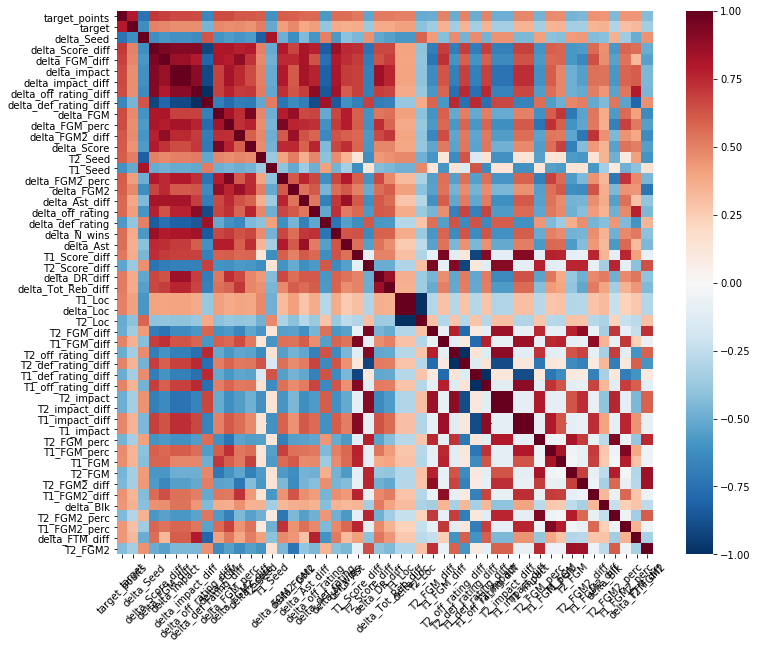

In [5]:
high_corr = exp.plot_correlations(df, target='target_points', limit=50)

                       delta_Seed  delta_Score_diff  delta_FGM_diff  \
delta_Seed               1.000000         -0.613768       -0.581241   
delta_Score_diff        -0.613768          1.000000        0.942808   
delta_FGM_diff          -0.581241          0.942808        1.000000   
delta_impact            -0.605961          0.920965        0.860149   
delta_impact_diff       -0.605961          0.920965        0.860149   
delta_off_rating_diff   -0.628580          0.921796        0.789068   
delta_def_rating_diff    0.628580         -0.921796       -0.789068   
delta_FGM               -0.594915          0.811695        0.817015   
delta_FGM_perc          -0.564594          0.817820        0.787393   
delta_FGM2_diff         -0.592496          0.774945        0.889223   
delta_Score             -0.568074          0.790414        0.721304   
T2_Seed                 -0.826880          0.507513        0.480617   
T1_Seed                  0.826880         -0.507513       -0.480617   
delta_

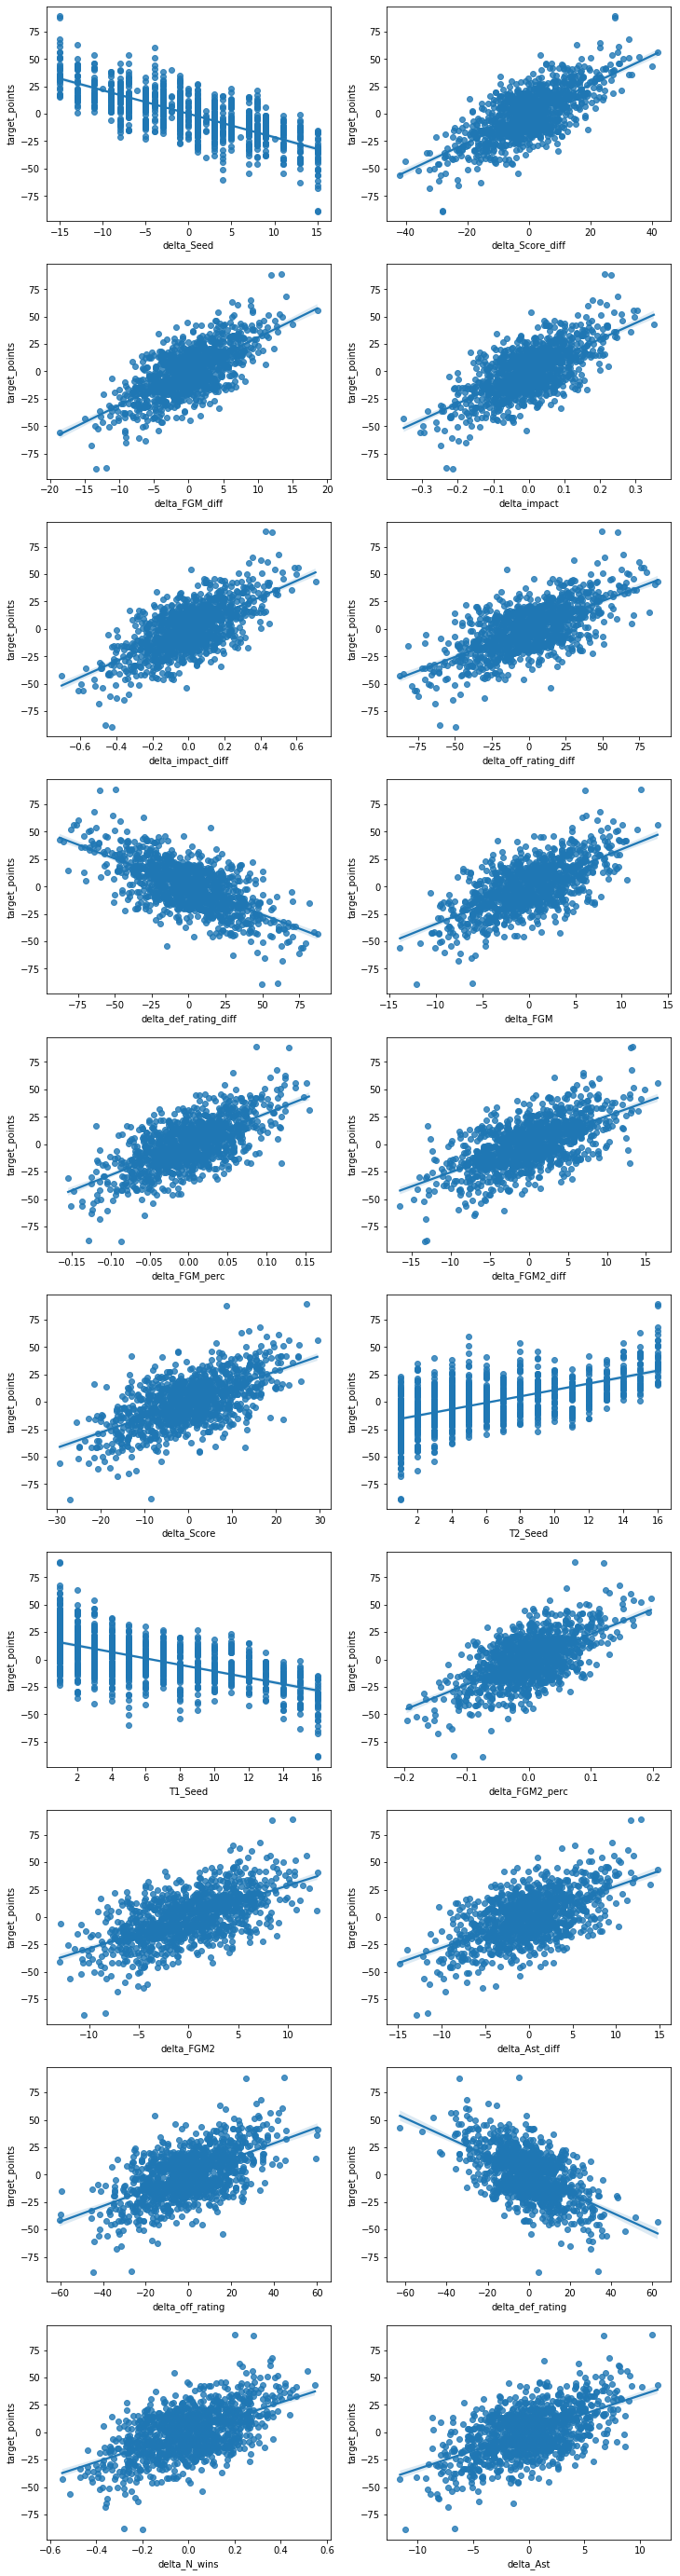

In [7]:
exp.corr_target(df, 'target_points', list(high_corr[2:22].index), x_estimator=None)

In [67]:
playoff.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,WFGM3,WFGA3,WFTM,WFTA,WOR,WDR,WAst,WTO,WStl,WBlk,WPF,LFGM,LFGA,LFGM3,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF,WFG_perc,WFGM2,WFGA2,WFG2_perc,WFG3_perc,WFT_perc,WTot_Reb,WFGM_no_ast,WFGM_no_ast_perc,Wpossessions,Woff_rating,Wscoring_opp,WTO_perposs,LFG_perc,LFGM2,LFGA2,LFG2_perc,LFG3_perc,LFT_perc,LTot_Reb,LFGM_no_ast,LFGM_no_ast_perc,Lpossessions,Loff_rating,Lscoring_opp,LTO_perposs,Wdef_rating,Ldef_rating,Wimpact,Limpact,WDef_effort,LDef_effort,WReb_opp,LReb_opp,Score_diff,FGM_diff,FGA_diff,FGM3_diff,FGA3_diff,FTM_diff,FTA_diff,OR_diff,DR_diff,Ast_diff,TO_diff,Stl_diff,Blk_diff,PF_diff,FGM2_diff,FGA2_diff,Tot_Reb_diff,FGM_no_ast_diff,Def_effort_diff,Reb_opp_diff,possessions_diff,off_rating_diff,def_rating_diff,scoring_opp_diff,TO_perposs_diff,impact_diff
0,2010,138,3124,69,3201,55,N,0,28,57,1,5,12,19,13,24,22,12,6,2,12,21,61,10,34,3,5,17,19,12,18,4,1,18,0.491228,27,52,0.519231,0.200000,0.631579,37,6,0.214286,46.975,146.886642,1.405535,0.255455,0.344262,11,27,0.407407,0.294118,0.600000,36,9,0.428571,59.625,92.243187,1.062893,0.301887,92.243187,146.886642,0.673640,0.326360,70.311475,62.526316,0.600000,0.655172,14,7,-4,-9,-29,9,14,-4,5,10,-6,2,1,-6,16,25,1,-3,7.785160,-0.055172,-12.650,54.643455,-54.643455,0.342642,-0.046432,0.347280
1,2010,138,3173,67,3395,66,N,0,23,59,9,26,12,19,13,34,13,16,3,10,14,22,73,8,27,14,15,18,26,8,8,8,6,22,0.389831,14,33,0.424242,0.346154,0.631579,47,10,0.434783,52.975,126.474752,1.284096,0.302029,0.301370,14,46,0.304348,0.296296,0.933333,44,14,0.636364,55.875,118.120805,1.434004,0.143177,118.120805,126.474752,0.608511,0.391489,99.890411,91.644068,0.666667,0.722222,1,1,-14,1,-1,-2,4,-5,8,5,8,-5,4,-8,0,-13,3,-4,8.246343,-0.055556,-2.900,8.353947,-8.353947,-0.149908,0.158853,0.217021
2,2010,138,3181,72,3214,37,H,0,26,57,4,13,16,22,13,34,15,11,10,7,11,15,56,4,15,3,8,10,21,4,16,6,4,20,0.456140,22,44,0.500000,0.307692,0.727273,47,11,0.423077,44.550,161.616162,1.514029,0.246914,0.267857,11,41,0.268293,0.266667,0.375000,31,11,0.733333,58.200,63.573883,1.027491,0.274914,63.573883,161.616162,0.911765,0.088235,85.464286,75.052632,0.829268,0.677419,35,11,1,0,-2,13,14,3,13,11,-5,4,3,-9,11,3,16,0,10.411654,0.151849,-13.650,98.042278,-98.042278,0.486538,-0.028001,0.823529
3,2010,138,3199,75,3256,61,H,0,25,63,3,15,22,26,20,27,13,17,8,3,21,21,62,2,20,17,22,16,21,13,16,5,4,24,0.396825,22,48,0.458333,0.200000,0.846154,47,12,0.480000,47.650,157.397692,1.581322,0.356768,0.338710,19,42,0.452381,0.100000,0.772727,37,8,0.380952,51.550,118.331717,1.405432,0.310378,118.331717,157.397692,0.641256,0.358744,96.935484,79.428571,0.658537,0.552632,14,4,1,1,-5,5,4,4,6,0,1,3,-1,-3,3,6,10,4,17.506912,0.105905,-3.900,39.065975,-39.065975,0.175891,0.046390,0.282511
4,2010,138,3207,62,3265,42,N,0,24,68,8,25,6,8,20,29,16,8,5,5,18,13,60,5,26,11,17,16,22,9,10,3,4,12,0.352941,16,43,0.372093,0.320000,0.750000,49,8,0.333333,52.200,118.773946,1.375479,0.153257,0.216667,8,34,0.235294,0.192308,0.647059,38,4,0.307692,45.925,91.453457,1.482308,0.217746,91.453457,118.773946,0.742331,0.257669,106.433333,70.588235,0.617021,0.500000,20,11,8,3,-1,-5,-9,4,7,7,-2,2,1,6,8,9,11,4,35.845098,0.117021,6.275,27.320490,-27.320490,-0.106829,-0.064490,0.484663


In [68]:
playoff = full_stats(playoff)
playoff.head()

,Season,TeamID,Score,FGM,FGA,FGM3,FGA3,FTM,FTA,OR,DR,Ast,TO,Stl,Blk,PF,FGM2,FGA2,Tot_Reb,FGM_no_ast,possessions,off_rating,scoring_opp,TO_perposs,def_rating,impact,Def_effort,Reb_opp,Score_diff,FGM_diff,FGA_diff,FGM3_diff,FGA3_diff,FTM_diff,FTA_diff,OR_diff,DR_diff,Ast_diff,TO_diff,Stl_diff,Blk_diff,PF_diff,FGM2_diff,FGA2_diff,Tot_Reb_diff,FGM_no_ast_diff,Def_effort_diff,Reb_opp_diff,possessions_diff,off_rating_diff,def_rating_diff,scoring_opp_diff,TO_perposs_diff,impact_diff,N_wins,FGM_perc,FGM2_perc,FGM3_perc,FT_perc,FGM_no_ast_perc
0,2010,3114,53.5,19.5,49.0,3.0,14.5,11.5,19.0,9.0,22.0,12.0,18.5,11.0,1.5,15.0,16.5,34.5,31.0,7.5,49.475,112.933352,1.199332,0.376916,100.447968,0.473966,59.626115,0.708333,-3.0,-3.5,-5.5,2.0,7.5,2.0,7.5,-2.5,-3.0,3.0,-0.5,3.5,-1.0,0.0,-5.5,-13.0,-5.5,-6.5,-22.195537,-0.139468,-7.0625,12.485384,-12.485384,0.141269,0.037605,-0.052069,0.5,0.397959,0.478261,0.206897,0.605263,0.384615
1,2010,3122,42.0,16.0,53.0,3.0,14.0,7.0,9.0,11.0,17.0,4.0,20.0,4.0,3.0,13.0,13.0,39.0,28.0,12.0,57.725,72.758770,0.992204,0.346470,141.978230,0.209524,59.731343,0.472222,-33.0,-15.0,-14.0,-2.0,-5.0,-1.0,-4.0,-10.0,-9.0,-14.0,7.0,-2.0,-2.0,-1.0,-13.0,-9.0,-19.0,-1.0,-13.740355,-0.230480,4.9000,-69.219460,69.219460,-0.393030,0.100375,-0.580952,0.0,0.301887,0.333333,0.214286,0.777778,0.750000
2,2010,3124,59.2,21.0,50.0,1.4,7.0,15.8,22.2,8.0,31.8,14.6,15.6,5.0,9.0,13.8,19.6,43.0,39.8,6.4,47.055,126.030359,1.289404,0.332993,98.688333,0.685023,93.137056,0.667879,5.6,0.8,-17.8,-3.4,-13.4,7.4,8.4,-9.6,7.6,2.4,4.2,-0.8,5.8,-4.2,4.2,-4.4,-2.0,-1.6,14.970002,-0.170119,-7.9900,27.342025,-27.342025,-0.074720,0.127307,0.370047,0.8,0.420000,0.455814,0.200000,0.711712,0.304762
3,2010,3132,62.0,19.0,51.0,11.0,22.0,13.0,22.0,10.0,25.0,12.0,16.0,5.0,1.0,15.0,8.0,29.0,35.0,7.0,46.550,133.190118,1.320086,0.343716,127.772848,0.434959,77.764706,0.625000,-10.0,-9.0,-17.0,7.0,6.0,1.0,8.0,-5.0,-2.0,-4.0,6.0,-3.0,-1.0,-5.0,-16.0,-23.0,-7.0,-5.0,-13.411765,-0.218750,-9.8000,5.417270,-5.417270,-0.004670,0.166254,-0.130081,0.0,0.372549,0.275862,0.500000,0.590909,0.368421
4,2010,3151,63.0,23.0,60.0,10.0,34.0,7.0,11.0,11.0,32.0,12.0,23.0,4.0,1.0,17.0,13.0,26.0,43.0,11.0,66.775,94.346687,0.976788,0.344440,129.449838,0.440299,102.714286,0.744186,-7.0,-4.0,-10.0,10.0,19.0,-9.0,-12.0,-4.0,4.0,-7.0,13.0,-9.0,-2.0,3.0,-14.0,-29.0,0.0,3.0,11.714286,-0.012571,12.7000,-35.103152,35.103152,-0.519745,0.159512,-0.119403,0.0,0.383333,0.500000,0.294118,0.636364,0.478261
